In [ ]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

In [ ]:
!pip install mediapipe

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import plotly.graph_objects as go
import os
import glob
import matplotlib.ticker as ticker
import random
import pandas as pd
from google.colab.patches import cv2_imshow
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
!kaggle datasets download -d uniquekavachshah/paralyzed
!unzip paralyzed.zip


paralyzed.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  paralyzed.zip
  inflating: 026ef210f4987a7aa11529c37220047a_3_11zon.jpg  
  inflating: 1-week-post-Selective-neurolysis-Before-Watermarked_1_11zon.jpg  
  inflating: 10_13_11zon.jpg         
  inflating: 116442_32_11zon.jpg     
  inflating: 118171_33_11zon.jpg     
  inflating: 11_14_11zon.jpg         
  inflating: 12_15_11zon.jpg         
  inflating: 13_16_11zon.jpg         
  inflating: 14_17_11zon.jpg         
  inflating: 15_18_11zon.jpg         
  inflating: 16_19_11zon.jpg         
  inflating: 17_20_11zon.jpg         
  inflating: 18_21_11zon.jpg         
  inflating: 19_22_11zon.jpg         
  inflating: 1_2_11zon.jpg           
  inflating: 20_23_11zon.jpg         
  inflating: 21_24_11zon.jpg         
  inflating: 22_25_11zon.jpg         
  inflating: 23_26_11zon.jpg         
  inflating: 24_27_11zon.jpg         
  inflating: 25_1_11zon.jpg          
  inflating: 26_2_

In [ ]:
import os
import shutil

source_folder = '/content/'  # Source folder containing the .jpg files
destination_folder = '/content/paralyzed'  # Destination folder where you want to move the files

# Create the destination folder if it doesn't exist
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Iterate through all files in the source folder
for filename in os.listdir(source_folder):
    if filename.endswith('.jpg'):
        source_file_path = os.path.join(source_folder, filename)
        destination_file_path = os.path.join(destination_folder, filename)
        shutil.move(source_file_path, destination_file_path)


In [ ]:
!kaggle datasets download -d uniquekavachshah/normal
!unzip normal.zip

normal.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  normal.zip
  inflating: 00014_1_11zon.jpg       
  inflating: 00018_2_11zon.jpg       
  inflating: 00037_3_11zon.jpg       
  inflating: 00071_4_11zon.jpg       
  inflating: 00079_5_11zon.jpg       
  inflating: 00086_6_11zon.jpg       
  inflating: 00101_7_11zon.jpg       
  inflating: 00103_8_11zon.jpg       
  inflating: 00144_9_11zon.jpg       
  inflating: 00197_10_11zon.jpg      
  inflating: 00202_11_11zon.jpg      
  inflating: 00221_12_11zon.jpg      
  inflating: 00242_13_11zon.jpg      
  inflating: 00251_14_11zon.jpg      
  inflating: 00266_15_11zon.jpg      
  inflating: 00275_16_11zon.jpg      
  inflating: 00298_17_11zon.jpg      
  inflating: 00300_18_11zon.jpg      
  inflating: 00355_19_11zon.jpg      
  inflating: 00361_20_11zon.jpg      
  inflating: 00424_21_11zon.jpg      
  inflating: 00439_22_11zon.jpg      
  inflating: 00445_23_11zon.jpg      
  inflating

In [ ]:
import os
import shutil

source_folder = '/content/'  # Source folder containing the .jpg files
destination_folder = '/content/normal'  # Destination folder where you want to move the files

# Create the destination folder if it doesn't exist
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Iterate through all files in the source folder
for filename in os.listdir(source_folder):
    if filename.endswith('.jpg'):
        source_file_path = os.path.join(source_folder, filename)
        destination_file_path = os.path.join(destination_folder, filename)
        shutil.move(source_file_path, destination_file_path)


In [ ]:
import os

# Specify the path to the folder where the files are located
folder_path = "/content/paralyzed"

# List of file names you want to remove from the folder
files_to_remove = ["normal_3a40977024cd85b87455f46bbc9128a4__69_11zon.jpg", "Before-Botox-for-synkinesis-Dr-Babak-Azizzadeh_48_11zon.jpg", "b-23_36_11zon.jpg","Before-Gracilis-Free-Flap-copy_49_11zon.jpg", "b-35_41_11zon.jpg"]

# Loop through the list of file names and remove them
for file_name in files_to_remove:
    file_path = os.path.join(folder_path, file_name)

    # Check if the file exists before attempting to remove it
    if os.path.exists(file_path):
        os.remove(file_path)
        print(f"Deleted: {file_name}")
    else:
        print(f"File not found: {file_name}")


Deleted: normal_3a40977024cd85b87455f46bbc9128a4__69_11zon.jpg
Deleted: Before-Botox-for-synkinesis-Dr-Babak-Azizzadeh_48_11zon.jpg
Deleted: b-23_36_11zon.jpg
Deleted: Before-Gracilis-Free-Flap-copy_49_11zon.jpg
Deleted: b-35_41_11zon.jpg


In [ ]:
path = ["/content/normal/*","/content/paralyzed/*"]

df = pd.DataFrame(columns=["FilePath","True_Label"])

for path_i in path:
  for ima in glob.glob(path_i):
    if path_i == "/content/normal/*":
      temp = [ima,0]
    else:
      temp = [ima,1]
    df = df.append(pd.Series(temp, index=df.columns), ignore_index=True)


In [ ]:
predicted_labels = pd.DataFrame(columns=["FilePath","True_Label","Area_Classifier"]) #Add your column to this dataframe

x = df["FilePath"].values
y = df["True_Label"].values

test_s = 0.5
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_s)

train_data = {"FilePath":x_train, "True_Label":y_train}
test_data = {"FilePath":x_test, "True_Label":y_test}

train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)

In [ ]:
train_df.head()

,FilePath,True_Label
0,/content/paralyzed/10_13_11zon.jpg,1
1,/content/normal/00014_1_11zon.jpg,0
2,/content/paralyzed/27_4_11zon.jpg,1
3,/content/paralyzed/11_14_11zon.jpg,1
4,/content/paralyzed/7_10_11zon.jpg,1


In [ ]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic
mp_pose = mp.solutions.pose
mp_face_mesh = mp.solutions.face_mesh

In [ ]:
def point_position_with_respect_to_line(m, b, point):
    x, y = point.x, point.y

    if m > 0:
      position = (m * x + b) - y
    else:
      position = -(m * x + b) + y


    if position > 0:
        return "Left"
    elif position < 0:
        return "Right"
    else:
        return "On the line"

In [ ]:
def calculate_line_equation(point1, point2):
    x1 = point1.x
    y1 = point1.y
    x2 = point2.x
    y2 = point2.y

    # Calculate the slope (m) of the line
    if x2 - x1 != 0:
        m = (y2 - y1) / (x2 - x1)
    else:
        m = float('inf')  # Vertical line

    # Calculate the y-intercept (b) of the line
    b = y1 - m * x1

    return m, b

In [ ]:
from mediapipe.framework.formats import landmark_pb2
def list_to_normalized_landmark(coord_list):

    landmark = landmark_pb2.NormalizedLandmark()
    landmark.x = coord_list[0]
    landmark.y = coord_list[1]
    landmark.z = coord_list[2]

    return landmark

In [ ]:
def calculate_midpoint(point1, point2):

    x1 = point1.x
    y1 = point1.y
    z1 = point1.z

    x2 = point2.x
    y2 = point2.y
    z2 = point2.z

    midpoint = [(x1 + x2) / 2,
                (y1 + y2) / 2,
                (z1 + z2) / 2]

    return midpoint

In [ ]:
def line_and_distance(point1, point2, point3):

    x1 = point1.x
    y1 = point1.y
    z1 = point1.z

    x2 = point2.x
    y2 = point2.y
    z2 = point2.z

    x0 = point3.x
    y0 = point3.y
    z0 = point3.z

    # Parametric Line Equation Coefficients
    a = x2 - x1
    b = y2 - y1
    c = z2 - z1

    # Line Equation: (x,y,z) = (x1,y1,z1) + t*(a,b,c)
    # where t is a real number

    # Calculate distance from point3 to the line
    # Point3 Vector
    p3_vector = np.array([x0, y0, z0])

    # Point1 Vector
    p1_vector = np.array([x1, y1, z1])

    # Direction Vector of line
    line_vector = np.array([a, b, c])

    # Compute the perpendicular distance from point3 to the line
    distance = np.linalg.norm(np.cross(p3_vector-p1_vector, line_vector)) / np.linalg.norm(line_vector)

    return distance

In [ ]:
def create_pairs(point_list):
    pairs = []
    for i in range(len(point_list) - 1):
        pairs.append([point_list[i], point_list[i + 1]])
    pairs.append([point_list[0], point_list[-1]])
    return pairs

In [ ]:
def calculate_intersection(new_point1, new_point2, known_line_slope, known_line_y_intercept):
    new_line_slope = (new_point2[1] - new_point1[1]) / (new_point2[0] - new_point1[0])
    new_line_y_intercept = new_point1[1] - new_line_slope * new_point1[0]

    # Calculate intersection x-coordinate
    intersection_x = (known_line_y_intercept - new_line_y_intercept) / (new_line_slope - known_line_slope)

    # Calculate intersection y-coordinate using the equation of the known line
    intersection_y = known_line_slope * intersection_x + known_line_y_intercept

    return intersection_x, intersection_y

In [ ]:
import math
def calculate_distance(point1, point2):
    x1 = point1.x
    y1 = point1.y
    z1 = point1.z

    x2 = point2.x
    y2 = point2.y
    z2 = point2.z
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

In [ ]:
def calculate_area(points):
    n = len(points)
    area = 0

    for i in range(n):
        x1, y1 = points[i]
        x2, y2 = points[(i + 1) % n]  # The modulo ensures we connect the last point to the first point

        area += (x1 * y2) - (x2 * y1)

    return abs(area) / 2

In [ ]:
def calculate_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def calculate_perimeter(points):
    n = len(points)
    perimeter = 0

    for i in range(n):
        perimeter += calculate_distance(points[i], points[(i + 1) % n])

    return perimeter

In [ ]:
def point_and_area_calc(img_df):
  point2_index = 152
  final_df = pd.DataFrame(columns = ["FilePath","L_Eye","R_Eye","L_Lips","R_Lips","True_Label"])
  for index,row in img_df.iterrows():
    print(row[0])
    img = cv2.cvtColor(cv2.imread(row[0]), cv2.COLOR_BGR2RGB)
    annotated_img = img.copy()
    drawing_spec = mp_drawing.DrawingSpec(thickness=2, circle_radius=1, color=[4, 244, 4])

  # Create a face mesh object
    with mp_face_mesh.FaceMesh(
          static_image_mode=True,
          max_num_faces=1,
          refine_landmarks=True,
          min_detection_confidence=0.5) as face_mesh:

      # Read image file with cv2 and convert from BGR to RGB
      results = face_mesh.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    face_found = bool(results.multi_face_landmarks)
  #print(i)
  #print(face_found)

  # Calculate the line equation

    temp = calculate_midpoint(results.multi_face_landmarks[0].landmark[133], results.multi_face_landmarks[0].landmark[362])
    mid_point = list_to_normalized_landmark(temp)
    slope, intercept = calculate_line_equation(mid_point, results.multi_face_landmarks[0].landmark[152])

# Count points on left and right sides
    left_count = 0
    right_count = 0

    upper_right = []
    upper_left = []

    landmark = results.multi_face_landmarks[0].landmark

    lipsUpperInner = [78, 191, 80, 81, 82, 13, 312, 311, 310, 415, 308]

    if face_found:
      for i in lipsUpperInner:
        position = point_position_with_respect_to_line(slope, intercept, landmark[i])
        if position == "Left":
          left_count += 1
          upper_left.append(i)
        elif position == "Right":
          right_count += 1
          upper_right.append(i)

    lipsLowerInner = [95, 88, 178, 87, 14, 317, 402, 318, 324]
    lower_left = []
    lower_right = []

    if face_found:
      for j in lipsLowerInner:
        position = point_position_with_respect_to_line(slope, intercept, landmark[j])
        if position == "Left":
          left_count += 1
          lower_left.append(j)
        elif position == "Right":
          right_count += 1
          lower_right.append(j)

    rev = lower_left[::-1]
    final_left = upper_left+rev
    rev = lower_right[::-1]
    final_right = upper_right+rev

  # Example landmark indices for the two points defining the new line
    new_point1_index = lower_right[-1]  # Replace with the actual landmark index
    new_point2_index = lower_left[0]  # Replace with the actual landmark index

  # Assuming you've processed the frame and obtained results with face_landmarks

    if results.multi_face_landmarks:
      for face_landmarks in results.multi_face_landmarks:
          landmark_points = []
          for landmark in face_landmarks.landmark:
              #x, y = int(landmark.x * annotated_img.shape[1]), int(landmark.y * annotated_img.shape[0])
              x, y = int(landmark.x), int(landmark.y)
              landmark_points.append((x, y))
              cv2.circle(annotated_img, (x, y), 2, (0, 255, 0), -1)  # Draw a green circle at each landmark point

          # Extract the x, y coordinates of the two points
          new_point1 = landmark_points[new_point1_index]
          new_point2 = landmark_points[new_point2_index]

          # Now you can use new_point1 and new_point2 in the intersection calculation

  # Example landmark indices for the two points defining the new line
    new_point3_index = upper_right[-1]  # Replace with the actual landmark index
    new_point4_index = upper_left[0]  # Replace with the actual landmark index

# Assuming you've processed the frame and obtained results with face_landmarks

    if results.multi_face_landmarks:
      for face_landmarks in results.multi_face_landmarks:
          landmark_points = []
          for landmark in face_landmarks.landmark:
              x, y = int(landmark.x * annotated_img.shape[1]), int(landmark.y * annotated_img.shape[0])
              landmark_points.append((x, y))
              cv2.circle(annotated_img, (x, y), 2, (0, 255, 0), -1)  # Draw a green circle at each landmark point

          # Extract the x, y coordinates of the two points
          new_point3 = landmark_points[new_point3_index]
          new_point4 = landmark_points[new_point4_index]

          # Now you can use new_point1 and new_point2 in the intersection calculation

    landmark_right_upper_first = face_landmarks.landmark[new_point3_index]
    landmark_right_lower_first = face_landmarks.landmark[new_point1_index]
    landmark_left_upper_first = face_landmarks.landmark[new_point4_index]
    landmark_left_lower_first = face_landmarks.landmark[new_point2_index]


    A = 0
    if results.multi_face_landmarks:
      landmarks = results.multi_face_landmarks[0].landmark
      image_height, image_width, _ = img.shape



    # Projected line 1 points
      point11 = (int(landmark_right_upper_first.x * image_width), int(landmark_right_upper_first.y * image_height))
      point22 = (int(landmark_left_upper_first.x * image_width), int(landmark_left_upper_first.y * image_height))
    # Calculate the slope and y-intercept of the projected line 1
      slope11 = (point22[1] - point11[1]) / (point22[0] - point11[0])
      y_intercept11 = point11[1] - slope11 * point11[0]

    # Projected line 2 points
      point3 = (int(mid_point.x * image_width), int(mid_point.y * image_height))
      point4 = (int(landmarks[point2_index].x * image_width), int(landmarks[point2_index].y * image_height))

    #print(point3)
    #print(point4)
    # Calculate the slope and y-intercept of the projected line 2
      if (point4[0] != point3[0]):
        slope2 = (point4[1] - point3[1]) / (point4[0] - point3[0])
        y_intercept2 = point3[1] - slope2 * point3[0]
        intersection_x = (y_intercept2 - y_intercept11) / (slope11 - slope2)
      else:
        intersection_x = point4[0]

    # Calculate the intersection point
      intersection_y = slope11 * intersection_x + y_intercept11

    # Draw the intersection point
      A = (int(intersection_x), int(intersection_y))
    #cv2.circle(annotated_img, A, 1, (255, 0, 0), -1)

    B = 0
    if results.multi_face_landmarks:
      landmarks = results.multi_face_landmarks[0].landmark
      image_height, image_width, _ = img.shape

    # Projected line 1 points
      point1 = (int(landmark_right_lower_first.x * image_width), int(landmark_right_lower_first.y * image_height))
      point2 = (int(landmark_left_lower_first.x * image_width), int(landmark_left_lower_first.y * image_height))

    # Calculate the slope and y-intercept of the projected line 1
      slope1 = (point2[1] - point1[1]) / (point2[0] - point1[0])
      y_intercept1 = point1[1] - slope1 * point1[0]

    # Projected line 2 points
      point3 = (int(mid_point.x * image_width), int(mid_point.y * image_height))
      point4 = (int(landmarks[point2_index].x * image_width), int(landmarks[point2_index].y * image_height))

    # Calculate the slope and y-intercept of the projected line 2
      if (point4[0] != point3[0]):
        slope2 = (point4[1] - point3[1]) / (point4[0] - point3[0])
        y_intercept2 = point3[1] - slope2 * point3[0]
        intersection_x = (y_intercept2 - y_intercept1) / (slope1 - slope2)
      else:
        intersection_x = point4[0]


    # Calculate the intersection point
      intersection_y = slope1 * intersection_x + y_intercept1

    # Draw the intersection point
      B = (int(intersection_x), int(intersection_y))
    #cv2.circle(annotated_img, B, 1, (255, 0, 0), -1)



    final_right_coords = []
    final_left_coords = []

  #right
    for i in upper_right:
      final_right_coords.append([results.multi_face_landmarks[0].landmark[i].x*annotated_img.shape[1],results.multi_face_landmarks[0].landmark[i].y*annotated_img.shape[0]])

    final_right_coords.append(A)
    final_right_coords.append(B)

    for i in lower_right[::-1]:
      final_right_coords.append([results.multi_face_landmarks[0].landmark[i].x*annotated_img.shape[1],results.multi_face_landmarks[0].landmark[i].y*annotated_img.shape[0]])


  #left
    final_left_coords.append(A)

    for i in upper_left:
      final_left_coords.append([results.multi_face_landmarks[0].landmark[i].x*annotated_img.shape[1],results.multi_face_landmarks[0].landmark[i].y*annotated_img.shape[0]])

    for i in lower_left[::-1]:
      final_left_coords.append([results.multi_face_landmarks[0].landmark[i].x*annotated_img.shape[1],results.multi_face_landmarks[0].landmark[i].y*annotated_img.shape[0]])

    final_left_coords.append(B)

    ra = calculate_area(final_right_coords)
    rp = calculate_perimeter(final_right_coords)


    '''right_area.append([ra,ima])'''

  #print(right_area)

    la = calculate_area(final_left_coords)
    lp = calculate_perimeter(final_left_coords)
    image_hight, image_width, _ = img.shape

  #list1 = [246, 161, 160, 159, 158, 157, 173, 33, 7, 163, 144, 145, 153, 154, 155, 133, 263, 249, 390, 373, 374, 380, 381, 382, 362, 466, 388, 387, 386, 385, 384, 398]

    eye_right = [33, 246, 161, 160, 159, 158, 157, 173, 133, 155, 154, 153, 145, 144, 163, 7]
    eye_left = [263, 466, 388, 387, 386, 385, 384, 398, 362, 382, 381, 380, 374, 373, 390, 249]

    eye_left_xy = []
    for i in eye_left:
      eye_left_xy.append([results.multi_face_landmarks[0].landmark[i].x,results.multi_face_landmarks[0].landmark[i].y])

    eye_right_xy = []
    for i in eye_right:
      eye_right_xy.append([results.multi_face_landmarks[0].landmark[i].x,results.multi_face_landmarks[0].landmark[i].y])

    ra_e = calculate_area(eye_right_xy)
    la_e = calculate_area(eye_left_xy)

    temp = [row[0],la_e,ra_e,la,ra,row[1]]
    final_df = final_df.append(pd.Series(temp, index=final_df.columns), ignore_index=True)
  return final_df

In [ ]:
'''dic = [{"Location":"/content/normal1.jpeg", "Label":0}, {"Location":"/content/para1.jpg", "Label":1}]
tp = pd.DataFrame(dic, index = [1,2])
rt =point_and_area_calc(tp)
rt.to_csv("aa.csv")'''

'dic = [{"Location":"/content/normal1.jpeg", "Label":0}, {"Location":"/content/para1.jpg", "Label":1}]\ntp = pd.DataFrame(dic, index = [1,2])\nrt =point_and_area_calc(tp)\nrt.to_csv("aa.csv")'

In [ ]:
'''dic = [{"Location":"/content/normal1.jpeg", "Label":0}, {"Location":"/content/para1.jpg", "Label":1}]
print(pd.DataFrame(dic, index = [1,2]))'''

'dic = [{"Location":"/content/normal1.jpeg", "Label":0}, {"Location":"/content/para1.jpg", "Label":1}]\nprint(pd.DataFrame(dic, index = [1,2]))'

In [ ]:
train_df

,FilePath,True_Label
0,/content/paralyzed/10_13_11zon.jpg,1
1,/content/normal/00014_1_11zon.jpg,0
2,/content/paralyzed/27_4_11zon.jpg,1
3,/content/paralyzed/11_14_11zon.jpg,1
4,/content/paralyzed/7_10_11zon.jpg,1
...,...,...
99,/content/paralyzed/14_17_11zon.jpg,1
100,/content/normal/01517_19_11zon.jpg,0
101,/content/normal/00221_12_11zon.jpg,0
102,/content/paralyzed/118171_33_11zon.jpg,1


In [ ]:
train_df_area = point_and_area_calc(train_df)

/content/paralyzed/10_13_11zon.jpg
/content/normal/00014_1_11zon.jpg
/content/paralyzed/27_4_11zon.jpg
/content/paralyzed/11_14_11zon.jpg
/content/paralyzed/7_10_11zon.jpg
/content/normal/TD_RGB_E_72_6_11zon.jpg
/content/paralyzed/Selective-neurolysis-with-asymmetric-facelift-before-watermarked_76_11zon.jpg
/content/normal/TD_RGB_E_38_16_11zon.jpg
/content/paralyzed/before_59_11zon.jpg
/content/paralyzed/Before-gracilis-muscle-transfer-Dr-Azizzadeh_50_11zon.jpg
/content/normal/01467_15_11zon.jpg
/content/normal/01016_31_11zon.jpg
/content/paralyzed/Before-Selective-Neurolysis-with-Facial-Rejuvenation-Dr-Babak-Azizzadeh-Facial-Paralysis-Institute_57_11zon.jpg
/content/paralyzed/b-37_43_11zon.jpg
/content/paralyzed/36_14_11zon.jpg
/content/normal/01781_36_11zon.jpg
/content/paralyzed/25_1_11zon.jpg
/content/normal/00572_27_11zon.jpg
/content/normal/00144_9_11zon.jpg
/content/paralyzed/Before-Selective-neurolysis-plastysma-facial-rejuvenation-Dr-Babak-Azizzadeh-Facial-Paralysis-Institute_

In [ ]:
test_df_area = point_and_area_calc(test_df)

/content/paralyzed/30_8_11zon.jpg
/content/paralyzed/719ead7f24fe33a37b105af6a60b0e7a_23_11zon.jpg
/content/normal/01177_6_11zon.jpg
/content/paralyzed/21_24_11zon.jpg
/content/normal/TD_RGB_E_97_13_11zon.jpg
/content/normal/TD_RGB_E_49_1_11zon.jpg
/content/normal/01607_27_11zon.jpg
/content/paralyzed/Selective-neurolysis-with-facial-rejuvenation-14-Before-Watermarked_77_11zon.jpg
/content/paralyzed/116442_32_11zon.jpg
/content/paralyzed/29_7_11zon.jpg
/content/paralyzed/19_22_11zon.jpg
/content/normal/01068_38_11zon.jpg
/content/paralyzed/beofre_61_11zon.jpg
/content/normal/00275_16_11zon.jpg
/content/paralyzed/3_5_11zon.jpg
/content/paralyzed/Latinx-woman-Selective-neurolysis-with-asymmetric-facelift-Before-Watermarked_67_11zon.jpg
/content/paralyzed/Selective-neurolysis-with-asymmetric-facelift-7-Before-Watermarked_75_11zon.jpg
/content/paralyzed/28_6_11zon.jpg
/content/paralyzed/8_11_11zon.jpg
/content/normal/00242_13_11zon.jpg
/content/normal/00086_6_11zon.jpg
/content/normal/0044

In [ ]:
test_df_area.shape

(104, 6)

In [ ]:
train_df_area["L_Ratio"] = train_df_area["L_Lips"]/train_df_area["L_Eye"]
train_df_area["R_Ratio"] = train_df_area["R_Lips"]/train_df_area["R_Eye"]

test_df_area["L_Ratio"] = test_df_area["L_Lips"]/test_df_area["L_Eye"]
test_df_area["R_Ratio"] = test_df_area["R_Lips"]/test_df_area["R_Eye"]

In [ ]:
train_df_area["Area_Ratio"] = train_df_area["L_Ratio"] / train_df_area["R_Ratio"]
train_df_area["Area_Ratio"].where(train_df_area["L_Ratio"] > train_df_area["R_Ratio"],
                           train_df_area["R_Ratio"] / train_df_area["L_Ratio"],
                           inplace=True)


test_df_area["Area_Ratio"] = test_df_area["L_Ratio"] / test_df_area["R_Ratio"]
test_df_area["Area_Ratio"].where(test_df_area["L_Ratio"] > test_df_area["R_Ratio"],
                           test_df_area["R_Ratio"] / test_df_area["L_Ratio"],
                           inplace=True)

In [ ]:
x_train = train_df_area["Area_Ratio"].tolist()
y_train = train_df_area["True_Label"].tolist()

x_test = test_df_area["Area_Ratio"].tolist()
y_test = test_df_area["True_Label"].tolist()

x_train = [[x] for x in x_train]
x_test = [[x] for x in x_test]

In [ ]:
clf = LogisticRegression()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy*100)

Accuracy: 68.26923076923077


In [ ]:
predicted_labels["FilePath"] = test_df_area["FilePath"]
predicted_labels["True_Label"] = test_df_area["True_Label"]
predicted_labels["Area_Classifier"] = y_pred

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Example ground truth labels and predicted labels
true = y_test
pred = y_pred
# Create a confusion matrix
cm = confusion_matrix(true, pred)

# Calculate evaluation metrics
accuracy = accuracy_score(true, pred)
precision = precision_score(true, pred)

recall = recall_score(true, pred)
f1 = f1_score(true, pred)



# Display confusion matrix and evaluation metrics
print("Confusion Matrix:")
print(cm)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
senstivity = tp / (tp+fn)
ppv = tp/(tp+fp)
npv = tn/(tn+fn)
print(f"PPV (Positive Predictive Value): {ppv:.2f}")
print(f"NPV (Negative Predictive Value): {npv:.2f}")
print(f"Specificity (True Negative Rate): {specificity:.2f}")
print(f"Senstivity (True Positive Rate): {senstivity:.2f}")
#ppv_l.append(ppv)
#npv_l.append(npv)


Confusion Matrix:
[[47  0]
 [33 24]]

Accuracy: 0.6826923076923077
Precision: 1.0
Recall: 0.42105263157894735
F1-Score: 0.5925925925925926
PPV (Positive Predictive Value): 1.00
NPV (Negative Predictive Value): 0.59
Specificity (True Negative Rate): 1.00
Senstivity (True Positive Rate): 0.42


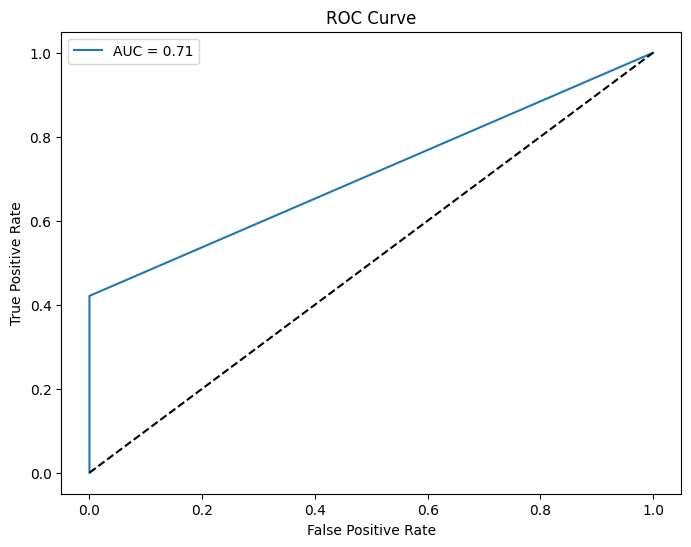

In [ ]:
fpr_area, tpr_area, thresholds = roc_curve(y_test, y_pred)
auc_area = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_area, tpr_area, label=f'AUC = {auc_area:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = x_train + x_test
y = y_test + y_train
num_folds = 10

stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True)
accuracy_scores = []

for train_index, test_index in stratified_kfold.split(X, y):
    X_train = [X[i] for i in train_index]
    X_test = [X[i] for i in test_index]
    y_train = [y[i] for i in train_index]
    y_test = [y[i] for i in test_index]

    model = LogisticRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)


mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)


print(accuracy_scores)
print(f'Mean Accuracy: {mean_accuracy:.2f}')
print(f'Standard Deviation: {std_accuracy:.2f}')


[0.5238095238095238, 0.6190476190476191, 0.5238095238095238, 0.6190476190476191, 0.5238095238095238, 0.5714285714285714, 0.47619047619047616, 0.42857142857142855, 0.55, 0.6]
Mean Accuracy: 0.54
Standard Deviation: 0.06


#frankfurt line classifer

In [ ]:
from google.colab import drive
import os
import math
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

function

In [ ]:
def dis1(lst1, lst2, lst3):
    x, y, z = lst1[0], lst2[0], lst3[0]
    x0, y0, z0 = lst1[1], lst2[1], lst3[1]
    x1, y1, z1 = lst1[2], lst2[2], lst3[2]

    a = (x - x0) ** 2
    b = (y - y0) ** 2
    c = (z - z0) ** 2

    a_line = (x1 - x0) ** 2
    b_line = (y1 - y0) ** 2
    c_line = (z1 - z0) ** 2

    distance = abs((x - x0) * math.sqrt(a_line) + (y - y0) * math.sqrt(b_line) + (z - z0) * math.sqrt(c_line))
    distance /= math.sqrt(a_line + b_line + c_line)

    return distance

In [ ]:
def ratio(df):

  mp_drawing = mp.solutions.drawing_utils
  mp_face_mesh = mp.solutions.face_mesh

  height1=[]
  height=[]
  x_list=[]
  y_list=[]
  z_list=[]

  #for i in range(len(df)):
  for index,row in df.iterrows():
    img = cv2.cvtColor(cv2.imread(row[0]), cv2.COLOR_BGR2RGB)
    #print(i)
    #print(df['FilePath'][i])
    image_path = row[0]
# Load and preprocess the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# List of landmark IDs to plot
    landmark_ids_to_plot = [61,227,447]

# Detect the face landmarks
    with mp_face_mesh.FaceMesh(
            static_image_mode=True,
            max_num_faces=1,
            min_detection_confidence=0.5) as face_mesh:
        results = face_mesh.process(image_rgb)

        if results.multi_face_landmarks:
            for face_landmarks in results.multi_face_landmarks:
                for landmark_id, landmark in enumerate(face_landmarks.landmark):
                  if landmark_id in landmark_ids_to_plot:
                    x, y = int(landmark.x * image.shape[1]), int(landmark.y * image.shape[0])
                    z = landmark.z
                    cv2.circle(image, (x, y), 2, (0, 255, 0), -1)
                    #print(f"Landmark {landmark.x,landmark.y,landmark.z}: ({x}, {y})")
                    x_list.append(landmark.x)
                    y_list.append(landmark.y)
                    z_list.append(landmark.z)
                  #print(subtract_elements(k))
                  #height.append(subtract_elements(k))
                  #print(x_list)
                  #print(y_list)
                  #print(z_list)


                height1.append(dis1(x_list,y_list,z_list))
                x_list=[]
                y_list=[]
                z_list=[]
              #plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
              #plt.axis('off')
              #plt.show()


  for i in range(len(df)):
    #print(i)
    image_path =  df['FilePath'][i]
# Load and preprocess the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# List of landmark IDs to plot
    landmark_ids_to_plot = [291,227,447]

# Detect the face landmarks
    with mp_face_mesh.FaceMesh(
            static_image_mode=True,
            max_num_faces=1,
            min_detection_confidence=0.5) as face_mesh:
        results = face_mesh.process(image_rgb)

        if results.multi_face_landmarks:
            for face_landmarks in results.multi_face_landmarks:
              for landmark_id, landmark in enumerate(face_landmarks.landmark):
                if landmark_id in landmark_ids_to_plot:
                  x, y = int(landmark.x * image.shape[1]), int(landmark.y * image.shape[0])
                  z = landmark.z
                  cv2.circle(image, (x, y), 2, (0, 255, 0), -1)
                  #print(f"Landmark {landmark.x,landmark.y,landmark.z}: ({x}, {y})")
                  x_list.append(landmark.x)
                  y_list.append(landmark.y)
                  z_list.append(landmark.z)
                  #print(subtract_elements(k))
                  #height.append(subtract_elements(k))
                  #print(x_list)
                  #print(y_list)
                  #print(z_list)
              #
              #
              height.append(dis1(x_list,y_list,z_list))
              x_list=[]
              y_list=[]
              z_list=[]
              #plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
              #plt.axis('off')
              #plt.show()

  height = [round(value, 3) for value in height]
  height1 = [round(value, 3) for value in height1]
  #print(height)
  #print(height1)

  #result=[]
  result = pd.DataFrame(columns = ["FilePath","Height_Ratio"])
  i=0
  for i in range(len(df)):
    if (height1[i]>height[i]):
      #result.append(height1[i]/height[i])
      result = result.append(pd.Series([image_path,(height1[i]/height[i])], index=result.columns), ignore_index=True)
    else :
      #result.append(height[i]/height1[i])
      result = result.append(pd.Series([image_path,(height[i]/height1[i])], index=result.columns), ignore_index=True)

  return(result)

In [ ]:
condition_column = 'True_Label'
condition_value = 1
# Extract columns based on condition
selected_columns = train_df[train_df[condition_column] == condition_value]
# Print the selected columns
train_df_para=selected_columns


condition_column = 'True_Label'
condition_value = 0
# Extract columns based on condition
selected_columns = train_df[train_df[condition_column] == condition_value]
# Print the selected columns
train_df_normal=selected_columns

print(len(train_df_para))
len(train_df_normal)

42


62

In [ ]:
# Assuming df is your DataFrame
n = len(train_df_normal)  # Replace this with your desired value of n
# Reset the index of df to range from 0 to n
train_df_normal.reset_index(drop=True, inplace=True)
new_index = pd.RangeIndex(start=0, stop=n)
train_df_normal.index = new_index

# Assuming df is your DataFrame
n = len(train_df_para)  # Replace this with your desired value of n
# Reset the index of df to range from 0 to n
train_df_para.reset_index(drop=True, inplace=True)
new_index = pd.RangeIndex(start=0, stop=n)
train_df_para.index=new_index

In [ ]:
train_data_1=ratio(train_df_para)
train_data_1['target'] = 1
train_data_2=ratio(train_df_normal)
train_data_2['target'] = 0


In [ ]:
x_train = []
x_train.extend(train_data_1['Height_Ratio'])
x_train.extend(train_data_2['Height_Ratio'])

y_train = []
y_train.extend(train_data_1['target'])
y_train.extend(train_data_2['target'])



In [ ]:
condition_column = 'True_Label'
condition_value = 1
# Extract columns based on condition
selected_columns = test_df[test_df[condition_column] == condition_value]
# Print the selected columns
test_df_para=selected_columns


condition_column = 'True_Label'
condition_value = 0
# Extract columns based on condition
selected_columns = test_df[test_df[condition_column] == condition_value]
# Print the selected columns
test_df_normal=selected_columns

print(len(test_df_para))
len(test_df_normal)

57


47

In [ ]:
# Assuming df is your DataFrame
n = len(test_df_normal)  # Replace this with your desired value of n
# Reset the index of df to range from 0 to n
test_df_normal.reset_index(drop=True, inplace=True)
new_index = pd.RangeIndex(start=0, stop=n)
test_df_normal.index = new_index

# Assuming df is your DataFrame
n = len(test_df_para)  # Replace this with your desired value of n
# Reset the index of df to range from 0 to n
test_df_para.reset_index(drop=True, inplace=True)
new_index = pd.RangeIndex(start=0, stop=n)
test_df_para.index=new_index

In [ ]:
test_data_1=ratio(test_df_para)
test_data_1['target'] = 1
test_data_2=ratio(test_df_normal)
test_data_2['target'] = 0


In [ ]:
x_test = []
x_test.extend(test_data_1['Height_Ratio'])
x_test.extend(test_data_2['Height_Ratio'])

y_test = []
y_test.extend(test_data_1['target'])
y_test.extend(test_data_2['target'])

In [ ]:
x_train = np.array(x_train).reshape(-1, 1)
x_test = np.array(x_test).reshape(-1, 1)
y_train = np.array(y_train)
y_test = np.array(y_test)


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.73


In [ ]:
predicted_labels

,FilePath,True_Label,Area_Classifier
0,/content/paralyzed/30_8_11zon.jpg,1,1
1,/content/paralyzed/719ead7f24fe33a37b105af6a60...,1,0
2,/content/normal/01177_6_11zon.jpg,0,0
3,/content/paralyzed/21_24_11zon.jpg,1,1
4,/content/normal/TD_RGB_E_97_13_11zon.jpg,0,0
...,...,...,...
99,/content/normal/TD_RGB_E_95_11_11zon.jpg,0,0
100,/content/normal/00251_14_11zon.jpg,0,0
101,/content/paralyzed/89900_30_11zon.jpg,1,1
102,/content/paralyzed/12_15_11zon.jpg,1,1


In [ ]:
predicted_labels['frankfurt_line_classifer']=y_pred

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Example ground truth labels and predicted labels
true = y_test
pred = y_pred
# Create a confusion matrix
cm = confusion_matrix(true, pred)

# Calculate evaluation metrics
accuracy = accuracy_score(true, pred)
precision = precision_score(true, pred)

recall = recall_score(true, pred)
f1 = f1_score(true, pred)


# Display confusion matrix and evaluation metrics
print("Confusion Matrix:")
print(cm)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
senstivity = tp / (tp+fn)
ppv = tp/(tp+fp)
npv = tn/(tn+fn)
print(f"PPV (Positive Predictive Value): {ppv:.2f}")
print(f"NPV (Negative Predictive Value): {npv:.2f}")
print(f"Specificity (True Negative Rate): {specificity:.2f}")
print(f"Senstivity (True Positive Rate): {senstivity:.2f}")
#ppv_l.append(ppv)
#npv_l.append(npv)

Confusion Matrix:
[[42  5]
 [23 34]]

Accuracy: 0.7307692307692307
Precision: 0.8717948717948718
Recall: 0.5964912280701754
F1-Score: 0.7083333333333334
PPV (Positive Predictive Value): 0.87
NPV (Negative Predictive Value): 0.65
Specificity (True Negative Rate): 0.89
Senstivity (True Positive Rate): 0.60


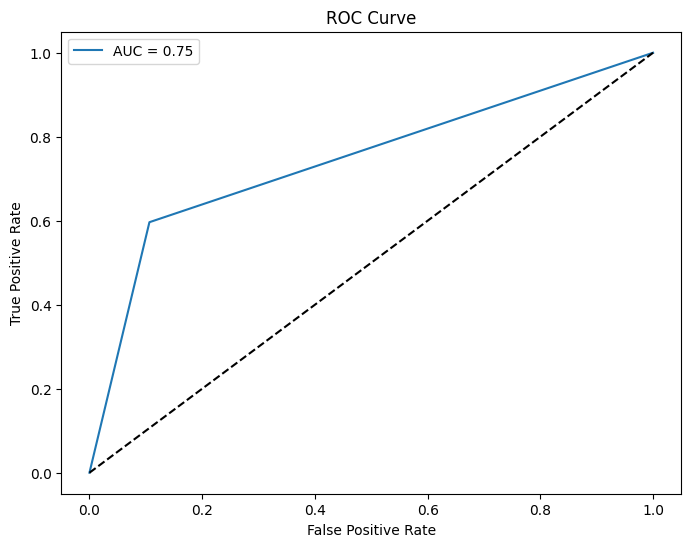

In [ ]:
fpr_frank, tpr_frank, thresholds = roc_curve(true, pred)
auc_frank = roc_auc_score(true, pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_frank, tpr_frank, label=f'AUC = {auc_frank:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = (x_train.tolist()) + (x_test.tolist())
y = (y_train.tolist()) + (y_test.tolist())
num_folds = 10

stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True)
accuracy_scores = []

for train_index, test_index in stratified_kfold.split(X, y):
    X_train = [X[i] for i in train_index]
    X_test = [X[i] for i in test_index]
    y_train = [y[i] for i in train_index]
    y_test = [y[i] for i in test_index]

    model = LogisticRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)


mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)


print(accuracy_scores)
print(f'Mean Accuracy: {mean_accuracy:.2f}')
print(f'Standard Deviation: {std_accuracy:.2f}')


[0.6666666666666666, 0.8095238095238095, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.6666666666666666, 0.8095238095238095, 0.7619047619047619, 0.7, 0.65]
Mean Accuracy: 0.76
Standard Deviation: 0.08


### Nasolabial Fold Classifier

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters.rank import entropy
from skimage.morphology import disk
from scipy import ndimage as nd
from mediapipe.python.solutions.drawing_utils import _normalized_to_pixel_coordinates
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import glob
from google.colab.patches import cv2_imshow
import copy
from PIL import Image
import plotly.graph_objects as go
import os
from mediapipe import ImageFormat
from scipy.stats import expon
from numpy import mean
from numpy import std
from scipy.stats import norm

!wget -O face_landmarker_v2_with_blendshapes.task -q https://storage.googleapis.com/mediapipe-models/face_landmarker/face_landmarker/float16/1/face_landmarker.task

In [ ]:
base_options = python.BaseOptions(model_asset_path='face_landmarker_v2_with_blendshapes.task')
options = vision.FaceLandmarkerOptions(base_options=base_options,
                                       output_face_blendshapes=True,
                                       output_facial_transformation_matrixes=True,
                                       num_faces=1)
detector = vision.FaceLandmarker.create_from_options(options)

In [ ]:
def black_white_dum(image_2,cord_left, cord_right):
  from scipy import stats
  # sobel_X = cv2.Sobel(image_2, cv2.CV_64F, 0, 1)
  # sobel_X_abs = np.uint8(np.absolute(sobel_X))
  # sobel_Y = cv2.Sobel(image_2, cv2.CV_64F,1, 0)
  # sobel_Y_abs = np.uint8(np.absolute(sobel_Y))
  # sobel_XY_combined = cv2.bitwise_or(sobel_Y_abs,sobel_X_abs)
  # black_and_white = cv2.cvtColor(sobel_XY_combined, cv2.COLOR_BGR2GRAY)
  black_and_white = cv2.cvtColor(image_2, cv2.COLOR_BGR2GRAY)
  polygon_vertices = np.array([cord_left])
  mask = np.zeros_like(black_and_white)
  cv2.fillPoly(mask, [polygon_vertices], (255, 255, 255))
  inverted_mask = cv2.bitwise_not(mask)
  color_outside_polygon = np.zeros_like(black_and_white)
  color_outside_polygon[:] = 1
  extracted_area_left = cv2.bitwise_and(black_and_white, black_and_white, mask=mask) + cv2.bitwise_and(color_outside_polygon, color_outside_polygon, mask=inverted_mask)

  polygon_vertices = np.array([cord_right])
  mask = np.zeros_like(black_and_white)
  cv2.fillPoly(mask, [polygon_vertices], (255, 255, 255))
  inverted_mask = cv2.bitwise_not(mask)
  color_outside_polygon = np.zeros_like(black_and_white)
  color_outside_polygon[:] = 1
  extracted_area_right = cv2.bitwise_and(black_and_white, black_and_white, mask=mask) + cv2.bitwise_and(color_outside_polygon, color_outside_polygon, mask=inverted_mask)
  # max_ = max([np.max(extracted_area_left),np.max(extracted_area_right)])/4
  non_black_pixels_l = np.where(extracted_area_left < 75)
  average_color_left = np.mean(extracted_area_left[non_black_pixels_l])
  if np.isnan(average_color_left):
    average_color_left = 1
  non_black_pixels_r = np.where(extracted_area_right < 75)
  average_color_right = np.mean(extracted_area_right[non_black_pixels_r])
  if np.isnan(average_color_right):
    average_color_right = 1
  diff = average_color_left - average_color_right
  try:
    ratio = average_color_left/average_color_right if average_color_left/average_color_right>1 else average_color_right/average_color_left
  except:
    ratio = average_color_left if average_color_left > 0 else average_color_right
  return ratio, diff

In [ ]:
def get_cords(img_cord,ls_single_face):
  image_rows, image_cols, _ = img_cord.shape
  nas_left= [216,98,129,209,142]
  nas_right=[436,327,358,429,371]
  cord_left = []
  cord_right = []
  for i in nas_left:
    cord_left.append(_normalized_to_pixel_coordinates(ls_single_face[i].x,ls_single_face[i].y,image_cols,image_rows))
  for j in nas_right:
    cord_right.append(_normalized_to_pixel_coordinates(ls_single_face[j].x,ls_single_face[j].y,image_cols,image_rows))
  return cord_left, cord_right

In [ ]:
def expo(normal, para):
  data_normal = np.array(normal)
  data_para = np.array(para)
  print(expon.fit(data_normal))
  lambda_normal = 1/(expon.fit(data_normal)[0])
  lambda_para = 1/(expon.fit(data_para)[0])
  return lambda_normal, lambda_para

In [ ]:
x_train_nas=[]
x_train_nas_df = pd.DataFrame(columns = ['Path', 'ratio', 'diff'])
for index,row in train_df.iterrows():
  img = cv2.imread(row[0])
  image = mp.Image.create_from_file(row[0])
  detection_result = detector.detect(image)
  cord_left, cord_right = get_cords(img, detection_result.face_landmarks[0])
  ratio, diff = black_white_dum(img,cord_left, cord_right)
  x_train_nas.append((ratio, diff))
  x_train_nas_df = x_train_nas_df.append(pd.Series([row[0],ratio, diff],index=x_train_nas_df.columns),ignore_index=True)



x_test_nas=[]
x_test_nas_df = pd.DataFrame(columns = ['Path', 'ratio', 'diff'])
for index,row in test_df.iterrows():
  img = cv2.imread(row[0])
  image = mp.Image.create_from_file(row[0])
  detection_result = detector.detect(image)
  cord_left, cord_right = get_cords(img, detection_result.face_landmarks[0])
  ratio,diff = black_white_dum(img,cord_left, cord_right)
  x_test_nas.append((ratio,diff))
  x_test_nas_df = x_test_nas_df.append(pd.Series([row[0],ratio, diff],index=x_test_nas_df.columns),ignore_index=True)

In [ ]:
x_train_nas_df

,Path,ratio,diff
0,/content/paralyzed/10_13_11zon.jpg,1.000000,0.000000
1,/content/normal/00014_1_11zon.jpg,1.001198,0.001198
2,/content/paralyzed/27_4_11zon.jpg,1.017686,0.019241
3,/content/paralyzed/11_14_11zon.jpg,1.000000,0.000000
4,/content/paralyzed/7_10_11zon.jpg,1.013958,-0.013958
...,...,...,...
99,/content/paralyzed/14_17_11zon.jpg,1.000000,0.000000
100,/content/normal/01517_19_11zon.jpg,1.024081,0.026839
101,/content/normal/00221_12_11zon.jpg,1.005688,-0.005688
102,/content/paralyzed/118171_33_11zon.jpg,1.001969,-0.001971


In [ ]:
diff_int_normal=[]
diff_int_para=[]
#for i in range(len(y_train)):
for index,row in train_df.iterrows():
  if row[1]==0:
    #diff_int_normal.append(x_train_nas[i][1])
    diff_int_normal.append(x_train_nas_df[x_train_nas_df["Path"]==row[0]]["diff"].values[0])
  else:
    diff_int_para.append(x_train_nas_df[x_train_nas_df["Path"]==row[0]]["diff"].values[0])
para_mean = mean(diff_int_para)
para_std = std(diff_int_para)
dist_para = norm(para_mean, para_std)
normal_mean = mean([diff_int_normal])
normal_std = std(diff_int_normal)
dist_normal = norm(normal_mean, normal_std)
print(dist_para,dist_normal)

<scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f1983abec20> <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f19815d6890>


In [ ]:
temp_labels = pd.DataFrame(columns=["FilePath", "Nasolabial_Classifier"])
#test_combined_diff = [x[1] for x in x_test_nas]

#for i in test_combined_diff:
for index,row in x_test_nas_df.iterrows():


  dist_pdf_para = dist_para.pdf(row[2])
  dist_pdf_normal = dist_normal.pdf(row[2])
  if  dist_pdf_para > dist_pdf_normal:
    #labels.append("Paralyzed")
    temp_labels = temp_labels.append(pd.Series([row[0],1],index=temp_labels.columns),ignore_index=True)
  else:
    #labels.append("Normal")
    temp_labels = temp_labels.append(pd.Series([row[0],0],index=temp_labels.columns),ignore_index=True)

In [ ]:
predicted_labels = pd.merge(predicted_labels, temp_labels, on='FilePath', how='inner')

In [ ]:
y_test = predicted_labels["True_Label"].tolist()
y_pred = predicted_labels["Nasolabial_Classifier"].tolist()
accuracy = accuracy_score(y_test, y_pred)



#print("Threshold value:", threshold)
print("Accuracy:", accuracy*100)

Accuracy: 57.692307692307686


In [ ]:
predicted_labels

,FilePath,True_Label,Area_Classifier,frankfurt_line_classifer,Nasolabial_Classifier
0,/content/paralyzed/30_8_11zon.jpg,1,1,0,1
1,/content/paralyzed/719ead7f24fe33a37b105af6a60...,1,0,1,0
2,/content/normal/01177_6_11zon.jpg,0,0,0,0
3,/content/paralyzed/21_24_11zon.jpg,1,1,1,0
4,/content/normal/TD_RGB_E_97_13_11zon.jpg,0,0,0,0
...,...,...,...,...,...
99,/content/normal/TD_RGB_E_95_11_11zon.jpg,0,0,0,0
100,/content/normal/00251_14_11zon.jpg,0,0,0,0
101,/content/paralyzed/89900_30_11zon.jpg,1,1,0,0
102,/content/paralyzed/12_15_11zon.jpg,1,1,0,0


K FOLD - NASOLABIAL

In [ ]:
nas_df = pd.DataFrame(columns = ["FilePath","True_Label", "Ratio", "Diff"])
for index,row in df.iterrows():
  img = cv2.imread(row[0])
  image = mp.Image.create_from_file(row[0])
  detection_result = detector.detect(image)
  cord_left, cord_right = get_cords(img, detection_result.face_landmarks[0])
  ratio, diff = black_white_dum(img,cord_left, cord_right)
  nas_df = nas_df.append(pd.Series([row[0],row[1],ratio, diff],index=nas_df.columns),ignore_index=True)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

num_folds = 20

x = nas_df["FilePath"].values.tolist()

y = nas_df["True_Label"].values.tolist()


stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True)
accuracy_scores = []

for train_index, test_index in stratified_kfold.split(x,y):
  X_train = [x[i] for i in train_index]
  X_test = [x[i] for i in test_index]
  Y_train = [y[i] for i in train_index]
  Y_test = [y[i] for i in test_index]
  # V_train = [v[i] for i in train_index]
  # V_test = [v[i] for i in test_index]

  diff_int_normal=[]
  diff_int_para=[]
  #for i in range(len(y_train)):
  for index,value in enumerate(Y_train):
    if value==0:
      diff_int_normal.append(nas_df[nas_df["FilePath"]==X_train[index]]["Diff"])
    else:
      diff_int_para.append(nas_df[nas_df["FilePath"]==X_train[index]]["Diff"])
  para_mean = mean(diff_int_para)
  para_std = std(diff_int_para)
  dist_para = norm(para_mean, para_std)
  normal_mean = mean([diff_int_normal])
  normal_std = std(diff_int_normal)
  dist_normal = norm(normal_mean, normal_std)



  temp_labels = pd.DataFrame(columns=["True_Label","FilePath", "Nasolabial_Classifier"])
  for index,value in enumerate(X_test):
    dist_pdf_para = dist_para.pdf(nas_df[nas_df["FilePath"]==value]["Diff"])
    dist_pdf_normal = dist_normal.pdf(nas_df[nas_df["FilePath"]==value]["Diff"])
    if  dist_pdf_para > dist_pdf_normal:
      #labels.append("Paralyzed")
      temp_labels = temp_labels.append(pd.Series([Y_test[index],value,1],index=temp_labels.columns),ignore_index=True)
    else:
      #labels.append("Normal")
      temp_labels = temp_labels.append(pd.Series([Y_test[index],value,0],index=temp_labels.columns),ignore_index=True)

  y_test = temp_labels["True_Label"].tolist()
  y_pred = temp_labels["Nasolabial_Classifier"].tolist()
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_scores.append(accuracy)

mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)


print(accuracy_scores)
print(f'Mean Accuracy: {mean_accuracy:.2f}')
print(f'Standard Deviation: {std_accuracy:.2f}')

[0.7272727272727273, 0.5454545454545454, 0.8181818181818182, 0.6363636363636364, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.6, 0.6, 0.7, 0.4, 0.3, 0.6, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6]
Mean Accuracy: 0.58
Standard Deviation: 0.11


# **Someone please change the true and predicted label below in the confusion matrix -- Ravi **

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Example ground truth labels and predicted labels
true = predicted_labels["True_Label"].tolist()
pred = predicted_labels["Nasolabial_Classifier"].tolist()
# Create a confusion matrix
cm = confusion_matrix(true, pred)

# Calculate evaluation metrics
accuracy = accuracy_score(true, pred)
precision = precision_score(true, pred)

recall = recall_score(true, pred)
f1 = f1_score(true, pred)


# Display confusion matrix and evaluation metrics
print("Confusion Matrix:")
print(cm)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
senstivity = tp / (tp+fn)
ppv = tp/(tp+fp)
npv = tn/(tn+fn)
print(f"PPV (Positive Predictive Value): {ppv:.2f}")
print(f"NPV (Negative Predictive Value): {npv:.2f}")
print(f"Specificity (True Negative Rate): {specificity:.2f}")
print(f"Senstivity (True Positive Rate): {senstivity:.2f}")
#ppv_l.append(ppv)
#npv_l.append(npv)

Confusion Matrix:
[[43  4]
 [40 17]]

Accuracy: 0.5769230769230769
Precision: 0.8095238095238095
Recall: 0.2982456140350877
F1-Score: 0.43589743589743585
PPV (Positive Predictive Value): 0.81
NPV (Negative Predictive Value): 0.52
Specificity (True Negative Rate): 0.91
Senstivity (True Positive Rate): 0.30


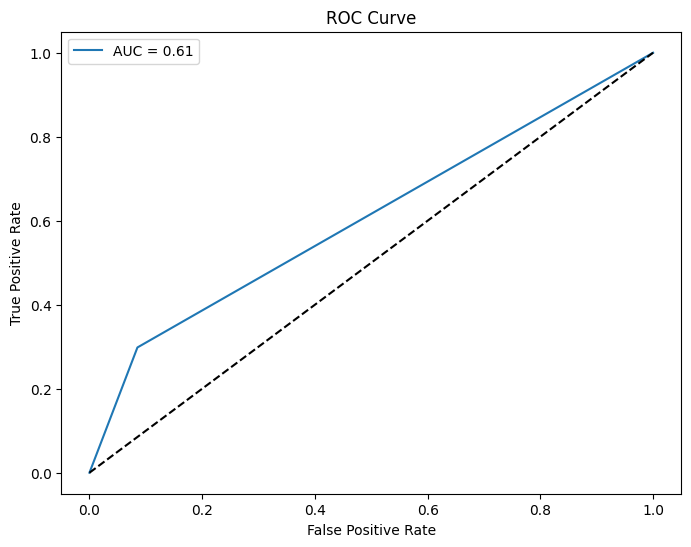

In [ ]:
fpr_naso, tpr_naso, thresholds = roc_curve(true,pred)
auc_naso = roc_auc_score(true, pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_naso, tpr_naso, label=f'AUC = {auc_naso:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
predicted_labels

,FilePath,True_Label,Area_Classifier,frankfurt_line_classifer,Nasolabial_Classifier
0,/content/paralyzed/30_8_11zon.jpg,1,1,0,1
1,/content/paralyzed/719ead7f24fe33a37b105af6a60...,1,0,1,0
2,/content/normal/01177_6_11zon.jpg,0,0,0,0
3,/content/paralyzed/21_24_11zon.jpg,1,1,1,0
4,/content/normal/TD_RGB_E_97_13_11zon.jpg,0,0,0,0
...,...,...,...,...,...
99,/content/normal/TD_RGB_E_95_11_11zon.jpg,0,0,0,0
100,/content/normal/00251_14_11zon.jpg,0,0,0,0
101,/content/paralyzed/89900_30_11zon.jpg,1,1,0,0
102,/content/paralyzed/12_15_11zon.jpg,1,1,0,0


#smile_index

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
def smile_index(img_df):

  mp_drawing = mp.solutions.drawing_utils
  mp_drawing_styles = mp.solutions.drawing_styles
  mp_face_mesh = mp.solutions.face_mesh

  face_mesh = mp_face_mesh.FaceMesh(
      static_image_mode=True,
      max_num_faces=1,
      refine_landmarks=True,
      min_detection_confidence=0.5
  )


  smile_index_ratio = []


  for index,row in img_df.iterrows():

    img = cv2.cvtColor(cv2.imread(row[0]), cv2.COLOR_BGR2RGB)
    results = face_mesh.process(img)

    if results.multi_face_landmarks:
        face_landmarks = results.multi_face_landmarks[0]
        annotated_image = img.copy()
        mp_drawing.draw_landmarks(
            image=img,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_TESSELATION,
            #landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style())


    # Method 1  Smile Index Ratio

    landmark_308 = face_landmarks.landmark[308]
    landmark_78 = face_landmarks.landmark[78]



    distance308_78 = math.sqrt((landmark_308.x*100 - landmark_78.x*100)**2 +
                               (landmark_308.y*100 - landmark_78.y*100)**2 +
                               (landmark_308.z*10 - landmark_78.z*10)**2)



    landmark_13 = face_landmarks.landmark[13]
    landmark_14 = face_landmarks.landmark[14]

    distance13_14 = math.sqrt((landmark_13.x*100 - landmark_14.x*100)**2 +
                               (landmark_13.y*100 - landmark_14.y*100)**2 +
                               (landmark_13.z*10 - landmark_14.z*10)**2)



    value = distance308_78 / distance13_14

    smile_index_ratio.append(value)
  return smile_index_ratio



In [ ]:
np.mean(smile_index(train_df_normal))

5.383912882862102

In [ ]:
np.std(smile_index(train_df_normal))

1.7932719430901394

In [ ]:
np.mean(smile_index(train_df_para))

10.88924777770435

In [ ]:
np.std(smile_index(train_df_para))

9.063021177860806

In [ ]:
threshold = ( np.mean(smile_index(train_df_normal)) + np.mean(smile_index(train_df_para))) / 2
threshold

8.136580330283227

In [ ]:
test_df

,FilePath,True_Label
0,/content/paralyzed/30_8_11zon.jpg,1
1,/content/paralyzed/719ead7f24fe33a37b105af6a60...,1
2,/content/normal/01177_6_11zon.jpg,0
3,/content/paralyzed/21_24_11zon.jpg,1
4,/content/normal/TD_RGB_E_97_13_11zon.jpg,0
...,...,...
99,/content/normal/TD_RGB_E_95_11_11zon.jpg,0
100,/content/normal/00251_14_11zon.jpg,0
101,/content/paralyzed/89900_30_11zon.jpg,1
102,/content/paralyzed/12_15_11zon.jpg,1


In [ ]:
var = smile_index(test_df)

In [ ]:
predict = []

for i in var:
  if i > threshold:
    predict.append(1)
  else:
    predict.append(0)



In [ ]:
len(predicted_labels)

104

In [ ]:
predicted_labels['Smile_Index_Ratio'] = predict
predicted_labels

,FilePath,True_Label,Area_Classifier,frankfurt_line_classifer,Nasolabial_Classifier,Smile_Index_Ratio
0,/content/paralyzed/30_8_11zon.jpg,1,1,0,1,0
1,/content/paralyzed/719ead7f24fe33a37b105af6a60...,1,0,1,0,0
2,/content/normal/01177_6_11zon.jpg,0,0,0,0,0
3,/content/paralyzed/21_24_11zon.jpg,1,1,1,0,0
4,/content/normal/TD_RGB_E_97_13_11zon.jpg,0,0,0,0,0
...,...,...,...,...,...,...
99,/content/normal/TD_RGB_E_95_11_11zon.jpg,0,0,0,0,0
100,/content/normal/00251_14_11zon.jpg,0,0,0,0,0
101,/content/paralyzed/89900_30_11zon.jpg,1,1,0,0,1
102,/content/paralyzed/12_15_11zon.jpg,1,1,0,0,1


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

true = predicted_labels['True_Label'].tolist()
pred = predicted_labels['Smile_Index_Ratio'].tolist()

accuracy = accuracy_score(true, pred)

print("Accuracy:", accuracy*100)

Accuracy: 75.96153846153845


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Example ground truth labels and predicted labels

# Create a confusion matrix
cm = confusion_matrix(true, pred)

# Calculate evaluation metrics
accuracy = accuracy_score(true, pred)
precision = precision_score(true, pred)

recall = recall_score(true, pred)
f1 = f1_score(true, pred)


# Display confusion matrix and evaluation metrics
print("Confusion Matrix:")
print(cm)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
senstivity = tp / (tp+fn)
ppv = tp/(tp+fp)
npv = tn/(tn+fn)
print(f"PPV (Positive Predictive Value): {ppv:.2f}")
print(f"NPV (Negative Predictive Value): {npv:.2f}")
print(f"Specificity (True Negative Rate): {specificity:.2f}")
print(f"Senstivity (True Positive Rate): {senstivity:.2f}")
#ppv_l.append(ppv)
#npv_l.append(npv)

Confusion Matrix:
[[45  2]
 [23 34]]

Accuracy: 0.7596153846153846
Precision: 0.9444444444444444
Recall: 0.5964912280701754
F1-Score: 0.7311827956989247
PPV (Positive Predictive Value): 0.94
NPV (Negative Predictive Value): 0.66
Specificity (True Negative Rate): 0.96
Senstivity (True Positive Rate): 0.60


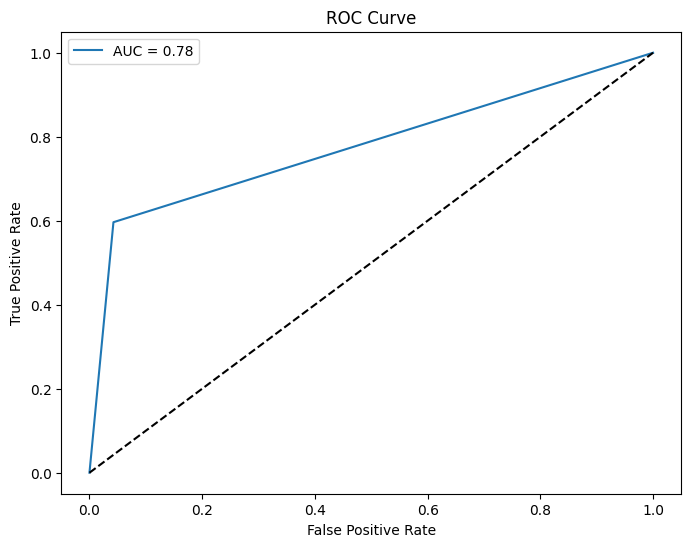

In [ ]:
fpr_smile, tpr_smile, thresholds = roc_curve(true,pred)
auc_smile = roc_auc_score(true, pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_smile, tpr_smile, label=f'AUC = {auc_smile:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# **Other Classifiers**

In [ ]:
left_eye_points = [[362,398,382],[398,382,384],[382,384,381],[384,381,385],[381,385,380],[385,380,386],[380,386,374],
    [386,374,387],[374,387,373],[387,373,388],[373,388,390],[388,390,466],[390,466,249],[466,249,263]]

right_eye_points = [[33,246,7],[246,7,163],[246,163,161],[161,163,144],[161,160,144],[160,144,145],[160,145,159],
    [145,159,153],[159,153,158],[158,153,154],[158,157,154],[157,154,155],[157,173,155],[173,155,133]]

left_mouth = [[308,324,415],[324,415,310],[324,318,310],[318,310,311],[318,402,311],[402,311,312],[402,317,312],
            [317,312,13],[317,14,13]]

right_mouth = [[78,191,95],[191,80,95],[95,88,80],[80,88,81],[88,81,178],[178,81,82],[178,82,87],[82,87,13],
            [87,14,13]]


In [ ]:
import math as m


def calculate_area(p_1, p_2, p_3):


    a = math.sqrt((p_1.x*100 - p_2.x*100)**2 +
                (p_1.y*100 - p_2.y*100)**2 +
                (p_1.z*10  - p_2.z*10)**2)

    b = math.sqrt((p_1.x*100 - p_3.x*100)**2 +
                (p_1.y*100 - p_3.y*100)**2 +
                (p_1.z*10  - p_3.z*10)**2)

    c = math.sqrt((p_2.x*100 - p_3.x*100)**2 +
                (p_2.y*100 - p_3.y*100)**2 +
                (p_2.z*10  - p_3.z*10)**2)

    s = (a+b+c)/2

    ar = m.sqrt(s * (s - a) * (s - b) * (s - c))
    ar = m.floor(ar)

    return ar

In [ ]:

def eye_area_classifier(img_df):

  mp_drawing = mp.solutions.drawing_utils
  mp_drawing_styles = mp.solutions.drawing_styles
  mp_face_mesh = mp.solutions.face_mesh

  face_mesh = mp_face_mesh.FaceMesh(
      static_image_mode=True,
      max_num_faces=1,
      refine_landmarks=True,
      min_detection_confidence=0.5
  )


  left_eye_area = []
  right_eye_area = []
  eye_area_diff = []

  left_mouth_area = []
  right_mouth_area = []
  mouth_area_diff = []


  for index,row in img_df.iterrows():

    img = cv2.cvtColor(cv2.imread(row[0]), cv2.COLOR_BGR2RGB)
    results = face_mesh.process(img)

    if results.multi_face_landmarks:

      face_landmarks = results.multi_face_landmarks[0]
      annotated_image = img.copy()
      mp_drawing.draw_landmarks(
          image=img,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_TESSELATION,
          #landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style())


    area = []
    area_2 = []
    area_3 = []
    area_4 = []

    for i in left_eye_points:

      p_1,p_2,p_3 = i
      lefteye = calculate_area(face_landmarks.landmark[p_1], face_landmarks.landmark[p_2], face_landmarks.landmark[p_3])
      area.append(lefteye)


    left_eye_area.append(sum(area))


    for j in right_eye_points:

      p_1,p_2,p_3 = j
      righteye = calculate_area(face_landmarks.landmark[p_1], face_landmarks.landmark[p_2], face_landmarks.landmark[p_3])
      area_2.append(righteye)


    right_eye_area.append(sum(area_2))


    for k in left_mouth:

      p_1,p_2,p_3 = k
      leftmouth = calculate_area(face_landmarks.landmark[p_1], face_landmarks.landmark[p_2], face_landmarks.landmark[p_3])
      area_3.append(leftmouth)


    left_mouth_area.append(sum(area_3))


    for l in right_mouth:

      p_1,p_2,p_3 = l
      rightmouth = calculate_area(face_landmarks.landmark[p_1], face_landmarks.landmark[p_2], face_landmarks.landmark[p_3])
      area_4.append(rightmouth)


    right_mouth_area.append(sum(area_4))



    for a in range(len(left_eye_area)):

      val = left_eye_area[a] - right_eye_area[a]
    eye_area_diff.append(np.abs(val))



    for b in range(len(left_mouth_area)):

      val = left_mouth_area[b] - right_mouth_area[b]
    mouth_area_diff.append(np.abs(val))




  return eye_area_diff,mouth_area_diff





In [ ]:
norm_eye, norm_mouth = eye_area_classifier(train_df_normal)

In [ ]:
para_eye, para_mouth = eye_area_classifier(train_df_para)

In [ ]:
np.mean(norm_eye)

1.8548387096774193

In [ ]:
np.mean(para_eye)

7.357142857142857

In [ ]:
np.std(norm_eye)

1.7399181867450197

In [ ]:
np.std(para_eye)

6.070308019843994

In [ ]:
np.mean(norm_mouth)

2.774193548387097

In [ ]:
np.mean(para_mouth)

7.976190476190476

In [ ]:
np.std(norm_mouth)

3.0974461636536272

In [ ]:
np.std(para_mouth)

8.865363568507163

In [ ]:
eye_threshold = ( np.mean(norm_eye) + np.mean(para_eye)) / 2
eye_threshold

4.605990783410138

In [ ]:
mouth_threshold = ( np.mean(norm_mouth) + np.mean(para_mouth)) / 2
mouth_threshold

5.375192012288787

In [ ]:
eye, mouth = eye_area_classifier(test_df)

mouth_predict = []
eye_predict = []


for i in mouth:
  if i > mouth_threshold:
    mouth_predict.append(1)
  else:
    mouth_predict.append(0)

for j in eye:
  if j > eye_threshold:
    eye_predict.append(1)
  else:
    eye_predict.append(0)



In [ ]:
eye, mouth = eye_area_classifier(test_df)

combine_predict = []

for i,j in zip(eye, mouth):
  if i > eye_threshold:
    combine_predict.append(1)

  elif j > mouth_threshold:
    combine_predict.append(1)

  else:
    combine_predict.append(0)


In [ ]:
predicted_labels['Eye_Classifier'] = eye_predict
predicted_labels['Mouth_Classifier'] = mouth_predict
predicted_labels['Combine_Classifier'] = combine_predict
predicted_labels


,FilePath,True_Label,Area_Classifier,frankfurt_line_classifer,Nasolabial_Classifier,Smile_Index_Ratio,Eye_Classifier,Mouth_Classifier,Combine_Classifier
0,/content/paralyzed/30_8_11zon.jpg,1,1,0,1,0,1,1,1
1,/content/paralyzed/719ead7f24fe33a37b105af6a60...,1,0,1,0,0,1,1,1
2,/content/normal/01177_6_11zon.jpg,0,0,0,0,0,0,0,0
3,/content/paralyzed/21_24_11zon.jpg,1,1,1,0,0,1,1,1
4,/content/normal/TD_RGB_E_97_13_11zon.jpg,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
99,/content/normal/TD_RGB_E_95_11_11zon.jpg,0,0,0,0,0,0,0,0
100,/content/normal/00251_14_11zon.jpg,0,0,0,0,0,0,0,0
101,/content/paralyzed/89900_30_11zon.jpg,1,1,0,0,1,0,0,0
102,/content/paralyzed/12_15_11zon.jpg,1,1,0,0,1,1,1,1


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

true = predicted_labels['True_Label'].tolist()
pred = predicted_labels['Eye_Classifier'].tolist()

accuracy = accuracy_score(true, pred)

print("Accuracy:", accuracy*100)

Accuracy: 78.84615384615384


In [ ]:
cm = confusion_matrix(true, pred)

# Calculate evaluation metrics
accuracy = accuracy_score(true, pred)
precision = precision_score(true, pred)

recall = recall_score(true, pred)
f1 = f1_score(true, pred)


# Display confusion matrix and evaluation metrics
print("Confusion Matrix:")
print(cm)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
senstivity = tp / (tp+fn)
ppv = tp/(tp+fp)
npv = tn/(tn+fn)
print(f"PPV (Positive Predictive Value): {ppv:.2f}")
print(f"NPV (Negative Predictive Value): {npv:.2f}")
print(f"Specificity (True Negative Rate): {specificity:.2f}")
print(f"Senstivity (True Positive Rate): {senstivity:.2f}")
#ppv_l.append(ppv)
#npv_l.append(npv)

Confusion Matrix:
[[43  4]
 [18 39]]

Accuracy: 0.7884615384615384
Precision: 0.9069767441860465
Recall: 0.6842105263157895
F1-Score: 0.78
PPV (Positive Predictive Value): 0.91
NPV (Negative Predictive Value): 0.70
Specificity (True Negative Rate): 0.91
Senstivity (True Positive Rate): 0.68


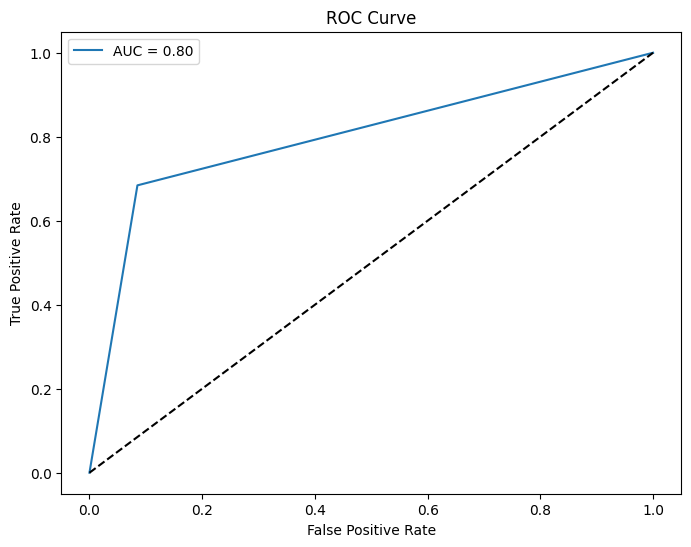

In [ ]:
fpr_eye, tpr_eye, thresholds = roc_curve(true,pred)
auc_eye = roc_auc_score(true, pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_eye, tpr_eye, label=f'AUC = {auc_eye:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
true = predicted_labels['True_Label'].tolist()
pred = predicted_labels['Mouth_Classifier'].tolist()

accuracy = accuracy_score(true, pred)

print("Accuracy:", accuracy*100)

Accuracy: 66.34615384615384


In [ ]:
cm = confusion_matrix(true, pred)

# Calculate evaluation metrics
accuracy = accuracy_score(true, pred)
precision = precision_score(true, pred)

recall = recall_score(true, pred)
f1 = f1_score(true, pred)


# Display confusion matrix and evaluation metrics
print("Confusion Matrix:")
print(cm)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
senstivity = tp / (tp+fn)
ppv = tp/(tp+fp)
npv = tn/(tn+fn)
print(f"PPV (Positive Predictive Value): {ppv:.2f}")
print(f"NPV (Negative Predictive Value): {npv:.2f}")
print(f"Specificity (True Negative Rate): {specificity:.2f}")
print(f"Senstivity (True Positive Rate): {senstivity:.2f}")
#ppv_l.append(ppv)
#npv_l.append(npv)


Confusion Matrix:
[[41  6]
 [29 28]]

Accuracy: 0.6634615384615384
Precision: 0.8235294117647058
Recall: 0.49122807017543857
F1-Score: 0.6153846153846154
PPV (Positive Predictive Value): 0.82
NPV (Negative Predictive Value): 0.59
Specificity (True Negative Rate): 0.87
Senstivity (True Positive Rate): 0.49


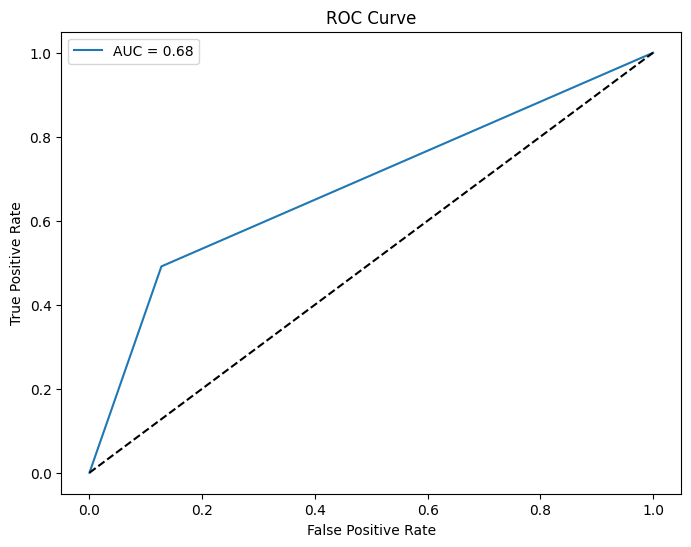

In [ ]:

fpr_mouth, tpr_mouth, thresholds = roc_curve(true,pred)
auc_mouth = roc_auc_score(true, pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_mouth, tpr_mouth, label=f'AUC = {auc_mouth:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
true = predicted_labels['True_Label'].tolist()
pred = predicted_labels['Combine_Classifier'].tolist()

accuracy = accuracy_score(true, pred)

print("Accuracy:", accuracy*100)

Accuracy: 78.84615384615384


In [ ]:
cm = confusion_matrix(true, pred)

# Calculate evaluation metrics
accuracy = accuracy_score(true, pred)
precision = precision_score(true, pred)

recall = recall_score(true, pred)
f1 = f1_score(true, pred)


# Display confusion matrix and evaluation metrics
print("Confusion Matrix:")
print(cm)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
senstivity = tp / (tp+fn)
ppv = tp/(tp+fp)
npv = tn/(tn+fn)
print(f"PPV (Positive Predictive Value): {ppv:.2f}")
print(f"NPV (Negative Predictive Value): {npv:.2f}")
print(f"Specificity (True Negative Rate): {specificity:.2f}")
print(f"Senstivity (True Positive Rate): {senstivity:.2f}")
#ppv_l.append(ppv)
#npv_l.append(npv)

Confusion Matrix:
[[38  9]
 [13 44]]

Accuracy: 0.7884615384615384
Precision: 0.8301886792452831
Recall: 0.7719298245614035
F1-Score: 0.8
PPV (Positive Predictive Value): 0.83
NPV (Negative Predictive Value): 0.75
Specificity (True Negative Rate): 0.81
Senstivity (True Positive Rate): 0.77


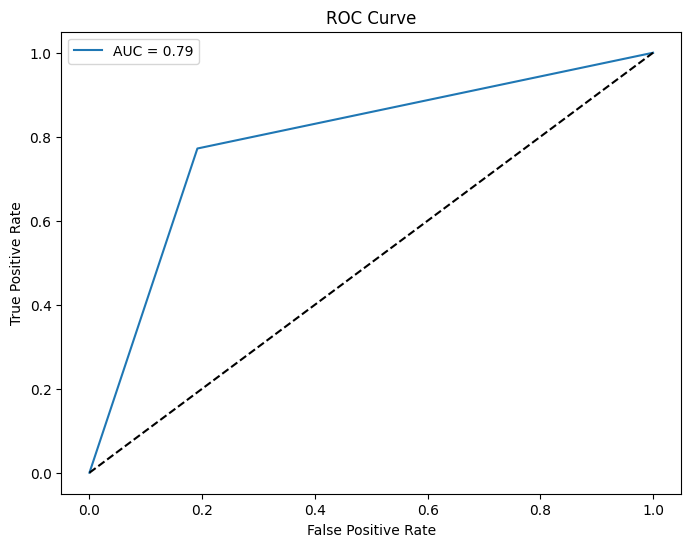

In [ ]:
true = predicted_labels['True_Label'].tolist()
pred = predicted_labels['Combine_Classifier'].tolist()

fpr, tpr, thresholds = roc_curve(true,pred)
auc = roc_auc_score(true, pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# **Stratified K Fold  Cross Validation for Smiling Index Classifier**

In [ ]:
train_df['True_Label'] = train_df['True_Label'].astype(int)


In [ ]:
from sklearn.model_selection import StratifiedKFold

num_folds = 5

skf = StratifiedKFold(n_splits=num_folds, shuffle=False)

accuracies = []

for train_index, val_index in skf.split(train_df['FilePath'], train_df['True_Label']):
    train_df_cv = train_df.iloc[train_index]

    test_df_cv = train_df.iloc[val_index]

    threshold = (np.mean(smile_index(train_df_cv[train_df_cv['True_Label'] == 0])) +
                 np.mean(smile_index(train_df_cv[train_df_cv['True_Label'] == 1]))) / 2

    var = smile_index(test_df_cv)
    predicted = []

    for i in var:
        if i > threshold:
            predicted.append(1)
        else:
            predicted.append(0)

    true = test_df_cv['True_Label'].tolist()
    pred = predicted

    accuracy = accuracy_score(true, pred)
    accuracies.append(accuracy)

for fold, accuracy in enumerate(accuracies, start=1):
    print(f"Fold {fold}: Accuracy = {accuracy * 100:.2f}")

average_accuracy = np.mean(accuracies)
print(f"Average Accuracy: {average_accuracy * 100:.2f}")


Fold 1: Accuracy = 85.71
Fold 2: Accuracy = 66.67
Fold 3: Accuracy = 80.95
Fold 4: Accuracy = 85.71
Fold 5: Accuracy = 70.00
Average Accuracy: 77.81


#combination





In [ ]:
predicted_labels

,FilePath,True_Label,Area_Classifier,frankfurt_line_classifer,Nasolabial_Classifier,Smile_Index_Ratio,Eye_Classifier,Mouth_Classifier,Combine_Classifier
0,/content/paralyzed/30_8_11zon.jpg,1,1,0,1,0,1,1,1
1,/content/paralyzed/719ead7f24fe33a37b105af6a60...,1,0,1,0,0,1,1,1
2,/content/normal/01177_6_11zon.jpg,0,0,0,0,0,0,0,0
3,/content/paralyzed/21_24_11zon.jpg,1,1,1,0,0,1,1,1
4,/content/normal/TD_RGB_E_97_13_11zon.jpg,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
99,/content/normal/TD_RGB_E_95_11_11zon.jpg,0,0,0,0,0,0,0,0
100,/content/normal/00251_14_11zon.jpg,0,0,0,0,0,0,0,0
101,/content/paralyzed/89900_30_11zon.jpg,1,1,0,0,1,0,0,0
102,/content/paralyzed/12_15_11zon.jpg,1,1,0,0,1,1,1,1


In [ ]:
original_df = predicted_labels
original_df = original_df.drop('FilePath', axis=1)
original_df = original_df.drop('True_Label', axis=1)

original_df = original_df.drop('Combine_Classifier', axis=1)

all together

In [ ]:
#df1 = original_df[['Area_Classifier', 'frankfurt_line_classifer', 'Nasolabial_Classifier', 'Smile_Index_Ratio', 'Eye_Classifier', 'Mouth_Classifier', 'Combine_Classifier']]
df1 = original_df[['Area_Classifier', 'frankfurt_line_classifer', 'Nasolabial_Classifier', 'Smile_Index_Ratio', 'Eye_Classifier', 'Mouth_Classifier']]
majority_values = df1.mode(axis=1, dropna=True)
# Extract the majority values as a list
majority_list = majority_values[0].tolist()


In [ ]:
print(accuracy_score(predicted_labels["True_Label"].tolist(),majority_list)*100)

60.57692307692307


Groups of 5

In [ ]:
import pandas as pd
from itertools import combinations
max_acc = -1
max_ppv = -1
max_npv = -1
group5 = ''
# Define the number of columns to select
num_columns_to_select = 5

# Get all combinations of column names
column_combinations = combinations(original_df.columns, num_columns_to_select)

# Create separate dataframes for each combination
dfs = []
for idx, columns in enumerate(column_combinations, start=1):
    new_df = original_df[list(columns)].copy()
    new_df.columns = [f'Column_{col}' for col in columns]
    dfs.append(new_df)

# Naming the dataframes and printing column names
for idx, df in enumerate(dfs, start=1):
    df_name = f'df_{idx}'
    globals()[df_name] = df
    print(f"{df_name} column names:")
    selected_columns = df.columns.values.tolist()
    selected_columns_without_prefix = [col.replace('Column_', '') for col in selected_columns]
    print(selected_columns_without_prefix)
    df1 = predicted_labels[selected_columns_without_prefix]
    majority_values = df1.mode(axis=1, dropna=True)
    # Extract the majority values as a list
    majority_list = majority_values[0].tolist()
    acc = accuracy_score(predicted_labels["True_Label"].tolist(),majority_list)*100
    print("Accuracy:",acc)

    true = predicted_labels["True_Label"].tolist()
    pred = majority_list

    f1 = f1_score(true, pred)

    cm = confusion_matrix(true, pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    senstivity = tp / (tp+fn)
    ppv = tp/(tp+fp)
    npv = tn/(tn+fn)
    print(f"PPV (Positive Predictive Value): {ppv:.2f}")
    print(f"NPV (Negative Predictive Value): {npv:.2f}")
    print("F1-Score:", f1)
    print(f"Specificity (True Negative Rate): {specificity:.2f}")
    print(f"Senstivity (True Positive Rate): {senstivity:.2f}")
    print()  # Add an empty line for separation
    print()  # Add an empty line for separation
    if max_acc == -1:
      max_acc = acc
    if acc > max_acc:
      max_acc = acc
      max_ppv = ppv
      max_npv = npv
      group5 = selected_columns_without_prefix
    #ppv_l.append(ppv)
    #npv_l.append(npv)
#ppv_l.append(max_ppv)
#npv_l.append(max_npv)

df_1 column names:
['Area_Classifier', 'frankfurt_line_classifer', 'Nasolabial_Classifier', 'Smile_Index_Ratio', 'Eye_Classifier']
Accuracy: 71.15384615384616
PPV (Positive Predictive Value): 1.00
NPV (Negative Predictive Value): 0.61
F1-Score: 0.6428571428571429
Specificity (True Negative Rate): 1.00
Senstivity (True Positive Rate): 0.47


df_2 column names:
['Area_Classifier', 'frankfurt_line_classifer', 'Nasolabial_Classifier', 'Smile_Index_Ratio', 'Mouth_Classifier']
Accuracy: 62.5
PPV (Positive Predictive Value): 0.95
NPV (Negative Predictive Value): 0.55
F1-Score: 0.4935064935064935
Specificity (True Negative Rate): 0.98
Senstivity (True Positive Rate): 0.33


df_3 column names:
['Area_Classifier', 'frankfurt_line_classifer', 'Nasolabial_Classifier', 'Eye_Classifier', 'Mouth_Classifier']
Accuracy: 65.38461538461539
PPV (Positive Predictive Value): 0.92
NPV (Negative Predictive Value): 0.57
F1-Score: 0.5609756097560975
Specificity (True Negative Rate): 0.96
Senstivity (True Positi

Groups of 3

df_1 column names:
['Area_Classifier', 'frankfurt_line_classifer', 'Nasolabial_Classifier']
Accuracy: 57.692307692307686
0.6121687196715192
[[46  1]
 [43 14]]
F1-Score: 0.38888888888888884
PPV (Positive Predictive Value): 0.93
NPV (Negative Predictive Value): 0.52
Specificity (True Negative Rate): 0.98
Senstivity (True Positive Rate): 0.25




df_2 column names:
['Area_Classifier', 'frankfurt_line_classifer', 'Smile_Index_Ratio']
Accuracy: 71.15384615384616
0.7349757372153788
[[46  1]
 [29 28]]
F1-Score: 0.6511627906976745
PPV (Positive Predictive Value): 0.97
NPV (Negative Predictive Value): 0.61
Specificity (True Negative Rate): 0.98
Senstivity (True Positive Rate): 0.49




df_3 column names:
['Area_Classifier', 'frankfurt_line_classifer', 'Eye_Classifier']
Accuracy: 75.0
0.7719298245614035
[[47  0]
 [26 31]]
F1-Score: 0.7045454545454546
PPV (Positive Predictive Value): 1.00
NPV (Negative Predictive Value): 0.64
Specificity (True Negative Rate): 1.00
Senstivity (True Positive Rate):

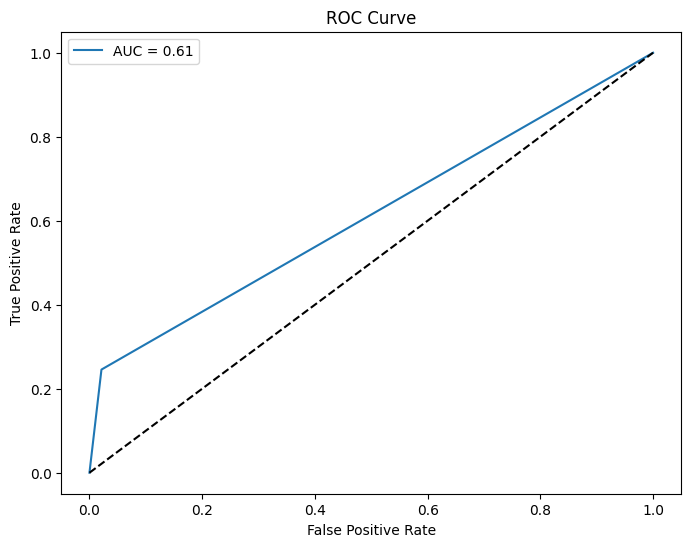

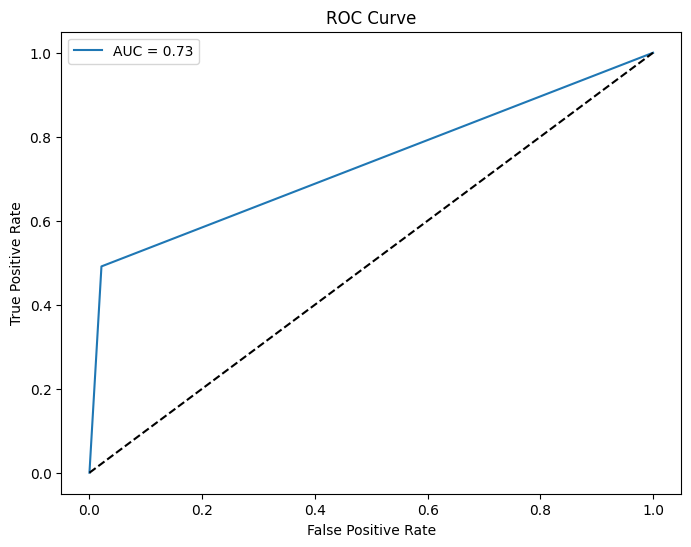

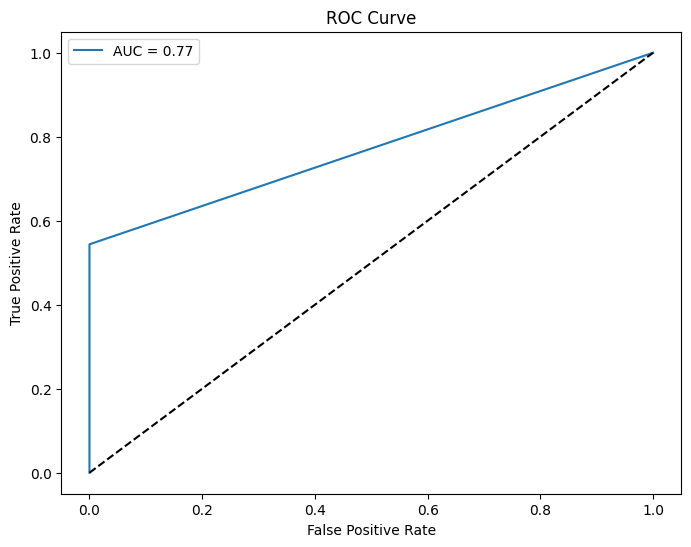

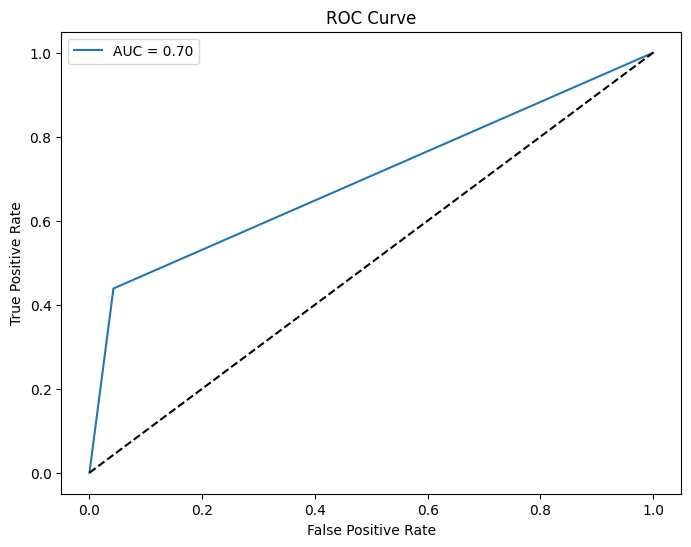

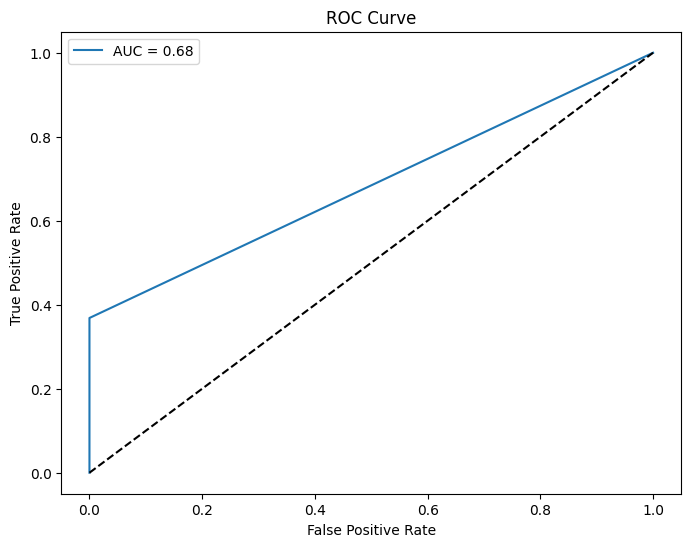

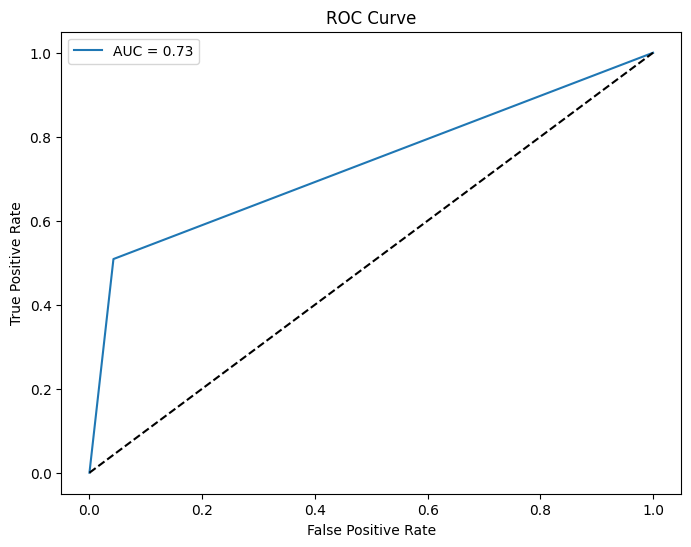

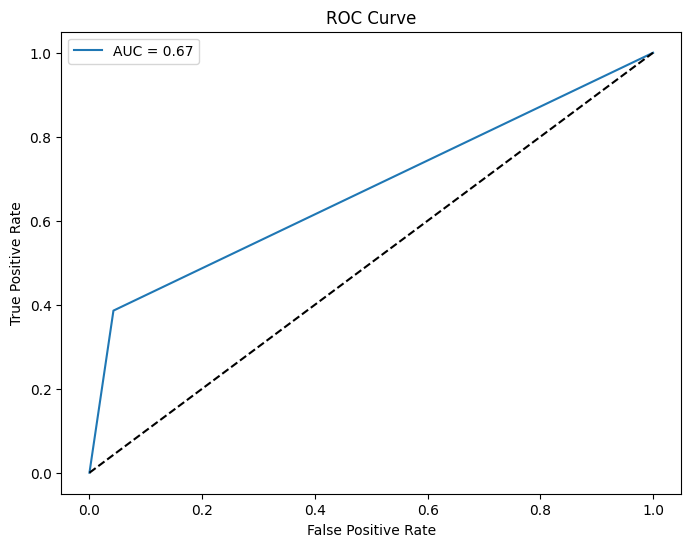

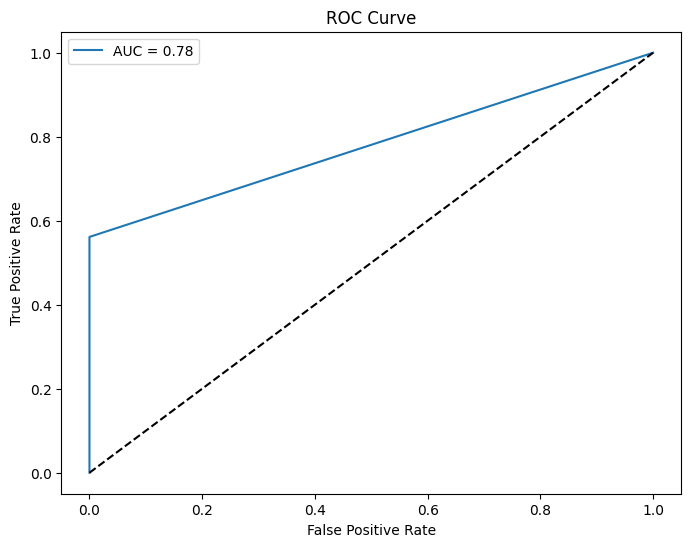

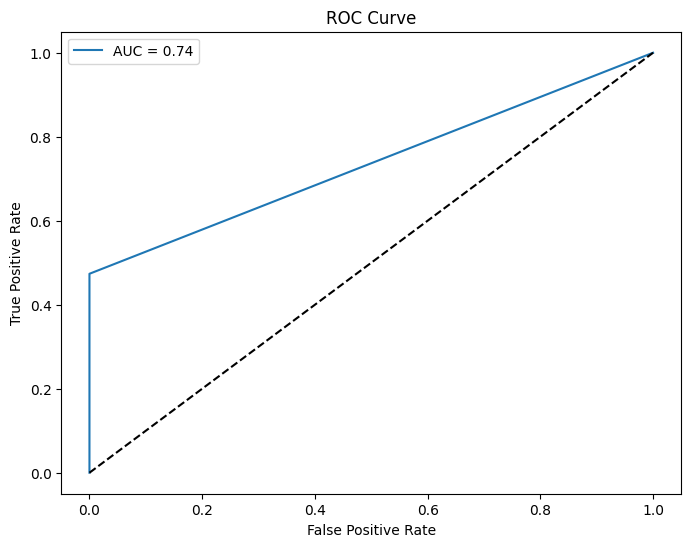

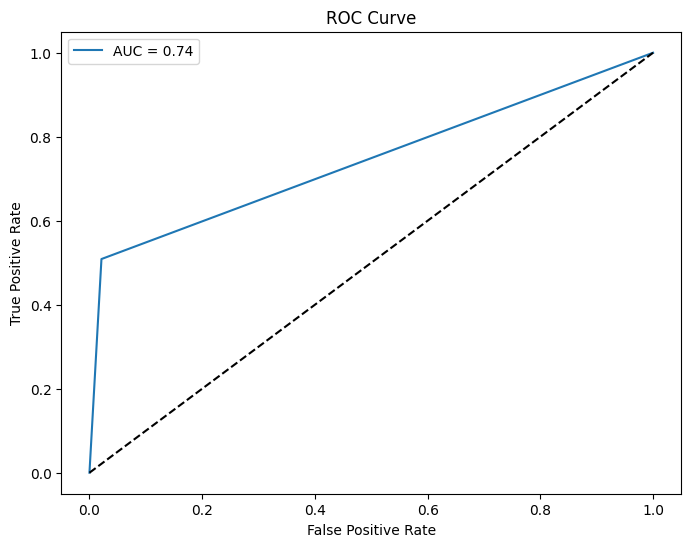

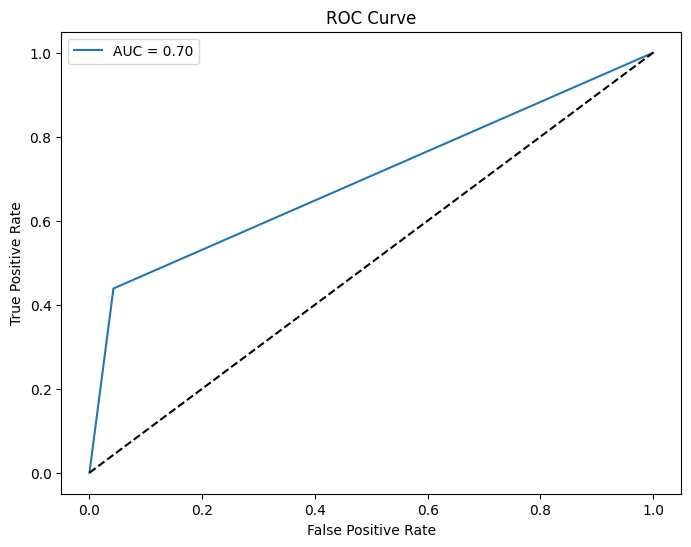

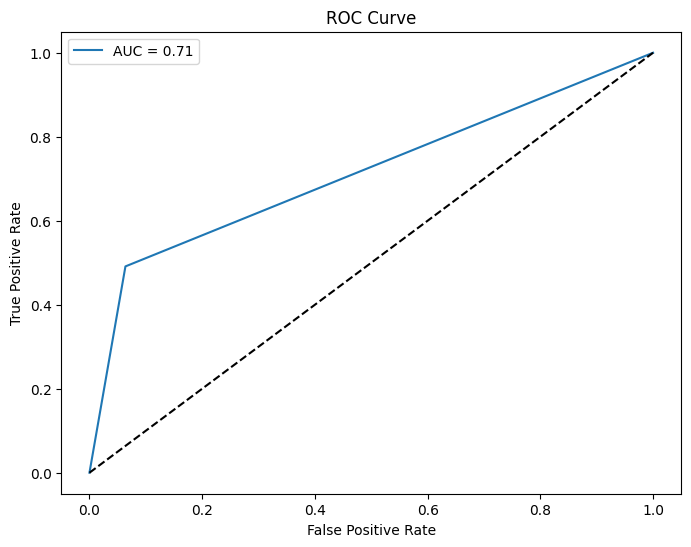

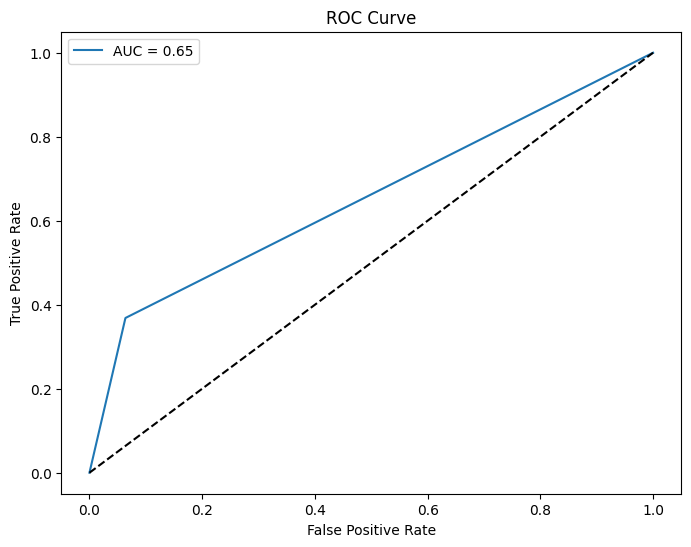

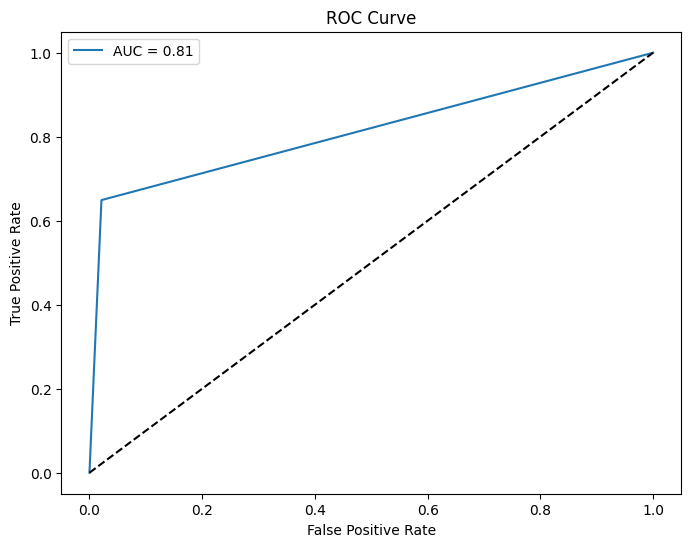

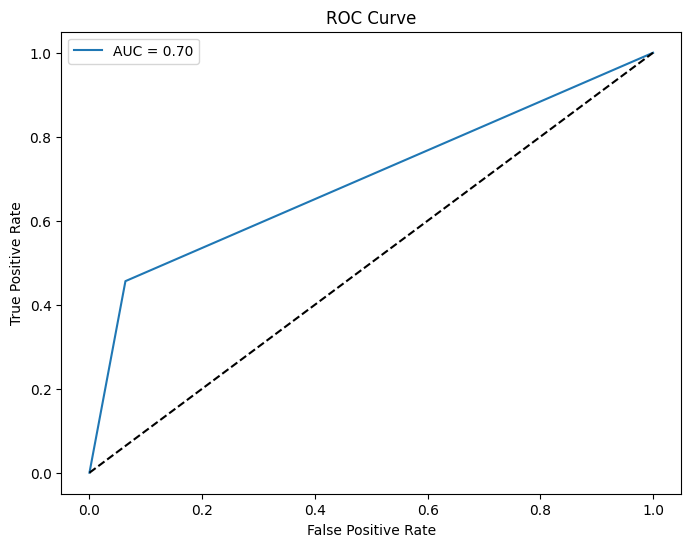

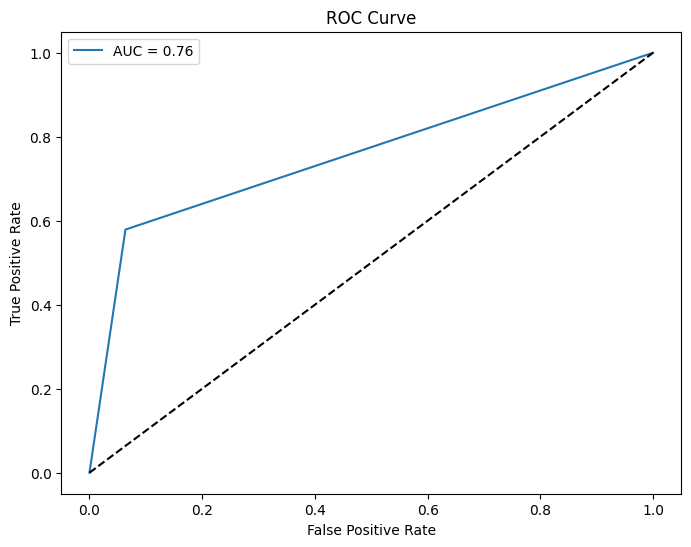

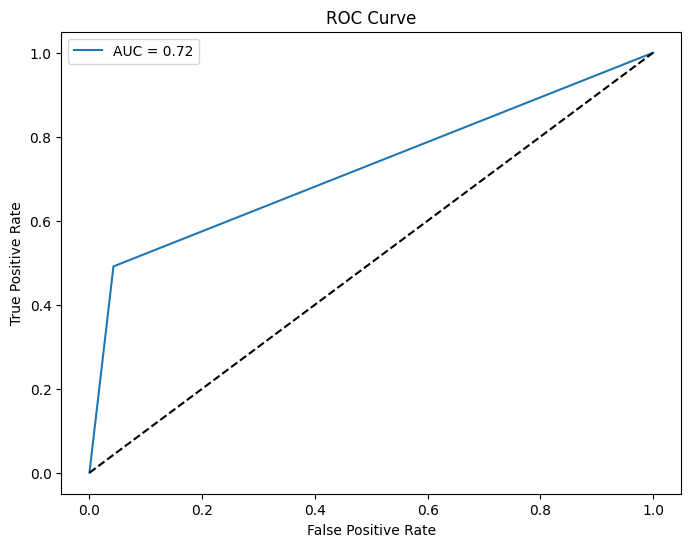

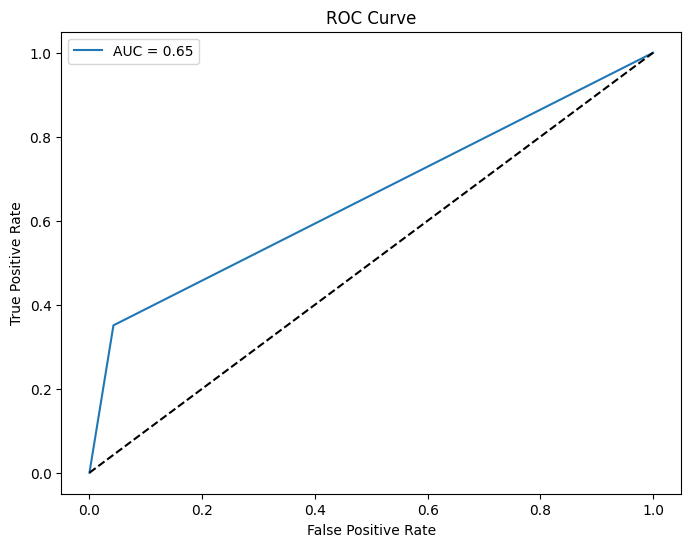

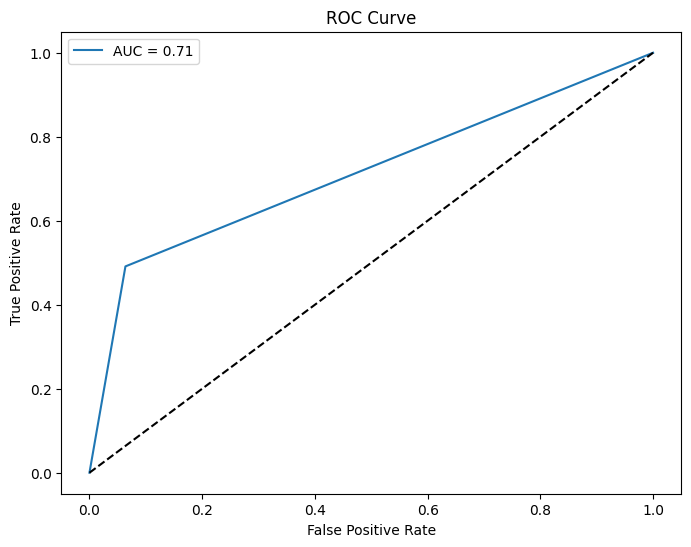

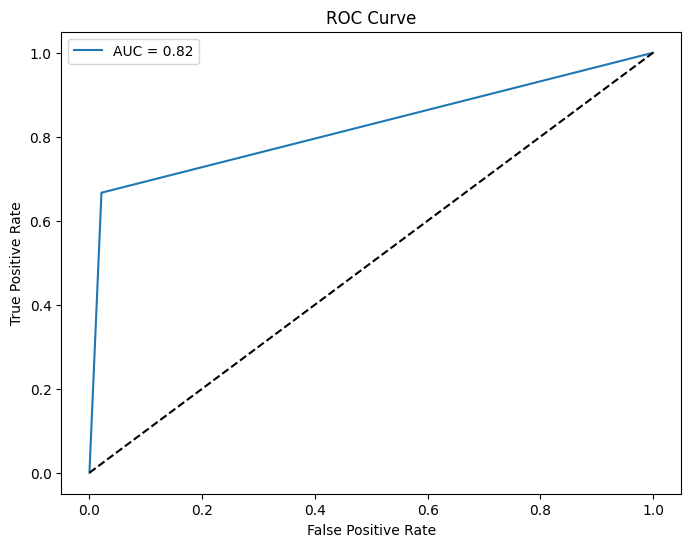

In [ ]:
import pandas as pd
from itertools import combinations
max_acc = -1
max_ppv = -1
max_npv = -1
group3 = ''
tempo = 0
fpr_max = -1
tpr_max = -1
auc_max = -1
# Define the number of columns to select
num_columns_to_select = 3

# Get all combinations of column names
column_combinations = combinations(original_df.columns, num_columns_to_select)

# Create separate dataframes for each combination
dfs = []
for idx, columns in enumerate(column_combinations, start=1):
    new_df = original_df[list(columns)].copy()
    new_df.columns = [f'Column_{col}' for col in columns]
    dfs.append(new_df)

# Naming the dataframes and printing column names
for idx, df in enumerate(dfs, start=1):
    df_name = f'df_{idx}'
    globals()[df_name] = df
    print(f"{df_name} column names:")
    selected_columns = df.columns.values.tolist()
    selected_columns_without_prefix = [col.replace('Column_', '') for col in selected_columns]
    print(selected_columns_without_prefix)
    df1 = predicted_labels[selected_columns_without_prefix]
    majority_values = df1.mode(axis=1, dropna=True)
    # Extract the majority values as a list
    majority_list = majority_values[0].tolist()
    acc = accuracy_score(predicted_labels["True_Label"].tolist(),majority_list)*100
    print("Accuracy:",acc)
    true = predicted_labels["True_Label"].tolist()
    pred = majority_list

    fpr, tpr, thresholds = roc_curve(true,pred)
    auc = roc_auc_score(true, pred)
    print(auc)
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.savefig(str(tempo))
    tempo+=1

    f1 = f1_score(true, pred)

    cm = confusion_matrix(true, pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    senstivity = tp / (tp+fn)

    print(cm)

    print("F1-Score:", f1)
    ppv = tp/(tp+fp)
    npv = tn/(tn+fn)
    print(f"PPV (Positive Predictive Value): {ppv:.2f}")
    print(f"NPV (Negative Predictive Value): {npv:.2f}")
    print(f"Specificity (True Negative Rate): {specificity:.2f}")
    print(f"Senstivity (True Positive Rate): {senstivity:.2f}")
    print()  # Add an empty line for separation
    print()  # Add an empty line for separation
    print()  # Add an empty line for separation
    print()  # Add an empty line for separation

    if max_acc == -1:
      max_acc = acc
    if acc > max_acc:
      max_acc = acc
      max_ppv = ppv
      max_npv = npv
      group3 = selected_columns_without_prefix
      fpr_max = fpr
      tpr_max = tpr
      auc_max = auc


    #ppv_l.append(ppv)
    #npv_l.append(npv)
#ppv_l.append(max_ppv)
#npv_l.append(max_npv)
print("MAx acc:", round(max_acc,2),round(npv,2),round(ppv,2))

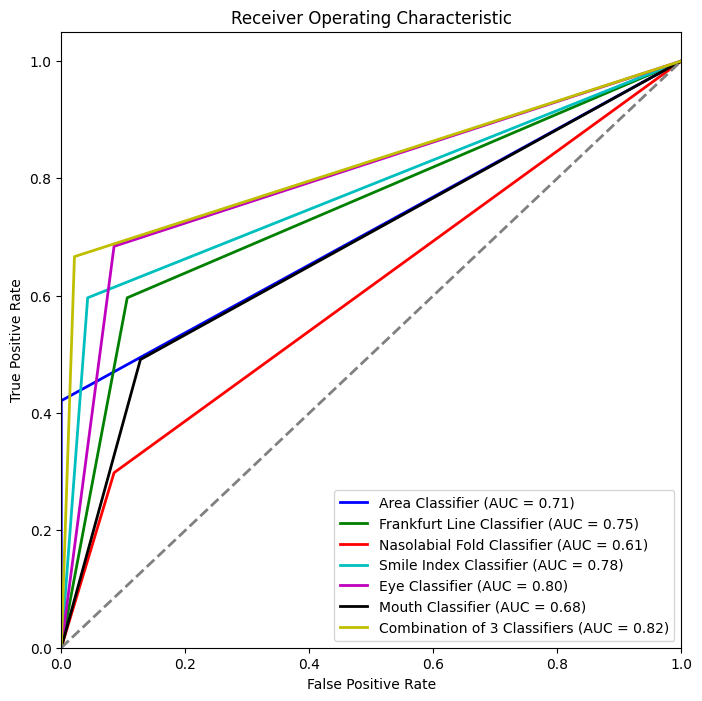

In [ ]:
plt.figure(figsize=(8, 8))

# Plot ROC curve for Model 1
plt.plot(fpr_area, tpr_area, color='b', lw=2, label=f'Area Classifier (AUC = {auc_area:.2f})')

# Plot ROC curve for Model 2
plt.plot(fpr_frank, tpr_frank, color='g', lw=2, label=f'Frankfurt Line Classifier (AUC = {auc_frank:.2f})')

plt.plot(fpr_naso, tpr_naso, color='r', lw=2, label=f'Nasolabial Fold Classifier (AUC = {auc_naso:.2f})')

plt.plot(fpr_smile, tpr_smile, color='c', lw=2, label=f'Smile Index Classifier (AUC = {auc_smile:.2f})')

plt.plot(fpr_eye, tpr_eye, color='m', lw=2, label=f'Eye Classifier (AUC = {auc_eye:.2f})')

plt.plot(fpr_mouth, tpr_mouth, color='k', lw=2, label=f'Mouth Classifier (AUC = {auc_mouth:.2f})')

plt.plot(fpr_max, tpr_max, color='y', lw=2, label=f'Combination of 3 Classifiers (AUC = {auc_max:.2f})')



# Add labels and legend
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

plt.show()